# Veitnam Youtube Data Analysis Notebook

This notebook contain complete Analysis procedure followed through data for understanding structure and extracting useful and Hidden Trends

Steps Followed are ->

1> Data cleaning

     ! Basic Overview Of Data.
     
     ! Overview of Dimensions ,structure and format of data.
     
     ! Check for missing Values and Thier type.

2> Descriptive statistics
      
      ! Data Summary (Performing 5 point Summary for each coloumn).
      
      ! Computing Skewness and Kurtosis for numerical Coloumn.
      
      ! Computing Cofficient of Variating for numerical Variable.
      
      ! Check for categories and their distribution using frequency table.
      
      ! Check for categories and their distribution using frequency table.
      
      ! Creating ease function to get depth view.
            
            # Function to search for any particular keyword and return related title from datset.
            # Function to extract channel link from id.
            # Functin that give summary of various factors on agivern keyword.
      
3> Data visualization
       
       ! Univariate, Bivariate and Multivariate Analysis.
       
       ! Histogram
       
       ! Scatterplot
       
       ! Barplot
       
       ! Density plot
       
       ! Correlation matrix
       
       ! Heatmap

4> Feature engineering
       
       ! Extracting new features from given features to get indepth view of data
       
5> Hypothesis testing
       
       ! Anova Testing
       
6> Clustering
        
        ! Grouping understanding of data

7> Dimensionality reduction
        
        ! Reduce the  

8> Time series analysis

    ! Analyzing trend and seasonality in view count over time

    ! Analyzing the relationship between view count and engagement rate over time using cross-correlation

**Importing all necessary libraries**


In [1]:
# Importing Necessary Libraries
library(tidyverse)
library(ggplot2)
library(tidytext)
library(caret)
library(scales)
library(xgboost)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




**Load Data**

In [3]:
# Read Data From Link
yt.data <- read.csv("/kaggle/input/youtube/ytbestDataattribute.csv" , header=TRUE , stringsAsFactor =FALSE)

# Data Cleaning

In [4]:
# First Five Inputs Of Data
head(yt.data)

,X,channel_id,channel_name,channel_category,channel_started,channel_rank,channel_subscribers,id,title,title_length,⋯,comment_count,dislike_count,like_per_view,comment_per_view,dislike_per_view,engagement_rate_1,engagement_rate_2,q_score,label_1,label_2
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,nehrVdADdH0,[FAP TV ] Thông Báo Tuyển Diễn Viên Nam Film Là Anh Phần 2,14,⋯,827,105,0.020731436,0.0024559372,0.0003118179,0.023187373,0.023499191,0.9703641,2,2
2,1,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,K66wOEaBwK4,Phía Sau Một Cô Gái - Soobin Hoàng Sơn | MV Fanmade - FAPtv,14,⋯,1594,664,0.010123703,0.0006222644,0.0002592118,0.010745968,0.011005180,0.9500696,1,2
3,2,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,D00vn3X7oI8,FAPtv Cơm Nguội: Tập 94 - Dấu Ấn Học Đường Phần 2,12,⋯,2214,3089,0.006007397,0.0002339762,0.0003264465,0.006241373,0.006567820,0.8969199,1,2
4,3,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G22G1k3G-kM,FAPtv Cơm Nguội: Tập 100 - Hành Trình Vui Vẻ,10,⋯,1752,2202,0.007931219,0.0002281653,0.0002867694,0.008159384,0.008446154,0.9302093,1,2
5,4,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G5EG7ymPErw,FAPtv Cơm Nguội: Tập 95 - Dấu Ấn Học Đường Phần Cuối,12,⋯,2417,2208,0.006485225,0.0003033928,0.0002771582,0.006788618,0.007065776,0.9180294,1,2
6,5,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,vrygmNKYovo,Là Anh Bonus: Phim Ngắn - Lần Đầu | Hi Team - FAPtv,13,⋯,3729,5074,0.009460696,0.0010258188,0.0013958178,0.010486514,0.011882332,0.7428608,1,0


# **Overview of Data**

In [5]:
#Dimension of data 
dim(yt.data)

[1] 23738    29

In [6]:
#check for coloumns 
colnames(yt.data)

[1] "X"                   "channel_id"          "channel_name"       
 [4] "channel_category"    "channel_started"     "channel_rank"       
 [7] "channel_subscribers" "id"                  "title"              
[10] "title_length"        "categories"          "description"        
[13] "tags"                "num_tags"            "upload_date"        
[16] "delta_upload_date"   "duration"            "view_count"         
[19] "like_count"          "comment_count"       "dislike_count"      
[22] "like_per_view"       "comment_per_view"    "dislike_per_view"   
[25] "engagement_rate_1"   "engagement_rate_2"   "q_score"            
[28] "label_1"             "label_2"

In [7]:
# check for mising values
yt.data %>% anyNA()

#check for missing coloumn wise
sapply(yt.data, function(x) sum(is.na(x)))

[1] FALSE

X          channel_id        channel_name    channel_category 
                  0                   0                   0                   0 
    channel_started        channel_rank channel_subscribers                  id 
                  0                   0                   0                   0 
              title        title_length          categories         description 
                  0                   0                   0                   0 
               tags            num_tags         upload_date   delta_upload_date 
                  0                   0                   0                   0 
           duration          view_count          like_count       comment_count 
                  0                   0                   0                   0 
      dislike_count       like_per_view    comment_per_view    dislike_per_view 
                  0                   0                   0                   0 
  engagement_rate_1   engagement_rate_2             q_score             label_1 
                  0                   0                   0                   0 
            label_2 
                  0

In [8]:
# check for variable type of each coloumn 
yt.data %>% sapply(class)

X          channel_id        channel_name    channel_category 
          "integer"         "character"         "character"         "character" 
    channel_started        channel_rank channel_subscribers                  id 
          "integer"           "integer"           "integer"         "character" 
              title        title_length          categories         description 
        "character"           "integer"         "character"         "character" 
               tags            num_tags         upload_date   delta_upload_date 
        "character"           "integer"         "character"           "integer" 
           duration          view_count          like_count       comment_count 
          "numeric"           "integer"           "integer"           "integer" 
      dislike_count       like_per_view    comment_per_view    dislike_per_view 
          "integer"           "numeric"           "numeric"           "numeric" 
  engagement_rate_1   engagement_rate_2             q_score             label_1 
          "numeric"           "numeric"           "numeric"           "integer" 
            label_2 
          "integer"

In [9]:
#familiar with structure of data 
str(yt.data) # also can use glimpse(yt.data)

'data.frame':	23738 obs. of  29 variables:
 $ X                  : int  0 1 2 3 4 5 6 7 8 9 ...
 $ channel_id         : chr  "UC0jDoh3tVXCaqJ6oTve8ebA" "UC0jDoh3tVXCaqJ6oTve8ebA" "UC0jDoh3tVXCaqJ6oTve8ebA" "UC0jDoh3tVXCaqJ6oTve8ebA" ...
 $ channel_name       : chr  "FAP TV" "FAP TV" "FAP TV" "FAP TV" ...
 $ channel_category   : chr  "Comedy" "Comedy" "Comedy" "Comedy" ...
 $ channel_started    : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ channel_rank       : int  2 2 2 2 2 2 2 2 2 2 ...
 $ channel_subscribers: int  12800000 12800000 12800000 12800000 12800000 12800000 12800000 12800000 12800000 12800000 ...
 $ id                 : chr  "nehrVdADdH0" "K66wOEaBwK4" "D00vn3X7oI8" "G22G1k3G-kM" ...
 $ title              : chr  "[FAP TV ] Thông Báo Tuyển Diễn Viên Nam Film Là Anh Phần 2" "Phía Sau Một Cô Gái - Soobin Hoàng Sơn | MV Fanmade - FAPtv" "FAPtv Cơm Nguội: Tập 94 - Dấu Ấn Học Đường Phần 2" "FAPtv Cơm Nguội: Tập 100 - Hành Trình Vui Vẻ" ...
 $ title_length       

# DESCRIPTIVE STATISTICS


In [10]:
summary(yt.data)

       X          channel_id        channel_name       channel_category  
 Min.   :    0   Length:23738       Length:23738       Length:23738      
 1st Qu.: 5934   Class :character   Class :character   Class :character  
 Median :11868   Mode  :character   Mode  :character   Mode  :character  
 Mean   :11868                                                           
 3rd Qu.:17803                                                           
 Max.   :23737                                                           
 channel_started  channel_rank  channel_subscribers      id           
 Min.   :2006    Min.   :   2   Min.   :   10000    Length:23738      
 1st Qu.:2011    1st Qu.: 127   1st Qu.:   73500    Class :character  
 Median :2014    Median :1555   Median :  150000    Mode  :character  
 Mean   :2014    Mean   :1189   Mean   : 1241124                      
 3rd Qu.:2016    3rd Qu.:1954   3rd Qu.: 2120000                      
 Max.   :2019    Max.   :2831   Max.   :12800000        

In [11]:
# Subset to include only numeric columns
numeric_cols <- sapply(yt.data, is.numeric)
numeric_df <- yt.data[, numeric_cols]

# Compute the skewness and kurtosis for each numeric variable
library(e1071)
apply(numeric_df, 2, function(x) c(skewness = skewness(x), kurtosis = kurtosis(x)))

,X,channel_started,channel_rank,channel_subscribers,title_length,num_tags,delta_upload_date,duration,view_count,like_count,comment_count,dislike_count,like_per_view,comment_per_view,dislike_per_view,engagement_rate_1,engagement_rate_2,q_score,label_1,label_2
skewness,0.000000,-0.4520476,0.01322037,3.642391,0.06242183,0.5122385,0.6330891,5.704599,23.90489,7.693121,10.18978,17.90123,24.01535,14.86928,6.895281,19.17206,18.70723,-1.436680,-0.02176604,-0.004687281
kurtosis,-1.200152,-0.8607619,-1.65316756,17.681962,-0.67916977,-0.3435789,0.0161745,65.139981,1233.44655,80.940994,151.11405,447.50706,835.90650,362.31837,84.235036,584.93251,562.98734,1.859586,-1.57218322,-1.586189458


In [12]:
library(statip)
# Compute the coefficient of variation (CV) for each variable
apply(numeric_df, 2, function(x) cv(x, na_rm=TRUE))

X     channel_started        channel_rank channel_subscribers 
        0.577386753         0.001493938         0.816508641         1.605470426 
       title_length            num_tags   delta_upload_date            duration 
        0.328948003         0.570532634         0.637755835         1.511804474 
         view_count          like_count       comment_count       dislike_count 
        4.962694132         3.512142822         3.917192597         7.524582082 
      like_per_view    comment_per_view    dislike_per_view   engagement_rate_1 
        2.170994006         3.174093751         1.284609217         1.999017749 
  engagement_rate_2             q_score             label_1             label_2 
        1.902738431         0.240879627         0.827374956         0.838918010

In [21]:
# Extracting mean for each coloumn
feat <- c("channel_rank","channel_subscribers","title_length","duration","view_count","like_count","comment_count","dislike_count","like_per_view","comment_per_view","dislike_per_view")
sapply(yt.data[,feat], function(x) mean(x))

channel_rank channel_subscribers        title_length            duration 
       1.188858e+03        1.241124e+06        1.428890e+01        1.741856e+01 
         view_count          like_count       comment_count       dislike_count 
       8.341856e+05        5.174301e+03        3.192085e+02        8.926738e+02 
      like_per_view    comment_per_view    dislike_per_view 
       1.119685e-02        2.134091e-03        8.215948e-04

In [18]:
# Extracting median for each column
feat <- c("channel_rank","channel_subscribers","title_length","duration","view_count","like_count","comment_count","dislike_count","like_per_view","comment_per_view","dislike_per_view")
sapply(yt.data[,feat] , function(x) median(x))

channel_rank channel_subscribers        title_length            duration 
       1.555000e+03        1.500000e+05        1.400000e+01        1.010000e+01 
         view_count          like_count       comment_count       dislike_count 
       4.020850e+04        1.940000e+02        2.500000e+01        1.900000e+01 
      like_per_view    comment_per_view    dislike_per_view 
       6.500120e-03        7.816868e-04        5.547420e-04

In [22]:
#check for rank bistribution 
table(yt.data$channel_rank)


   2   22   74   75   79   85   95  108  114  126  127  166  167  168  177  218 
 421  275  237 1517  384  172  491 1245   69  169 1490  874   30   36  176  433 
 223  252  261  263  274 1480 1485 1505 1521 1555 1563 1572 1630 1639 1691 1746 
 389  131  856  834  191  311  382  231  221 1007   90  138  500  952  269   71 
1765 1851 1873 1900 1912 1936 1944 1954 1990 1993 2063 2067 2068 2090 2115 2124 
  58  251  358  394  613 1067  442  128  613  170  146  241  150   11  289   70 
2255 2266 2348 2364 2385 2410 2420 2508 2522 2539 2544 2549 2591 2602 2606 2631 
 430  141  219  136   38  944  325   51   52  110   11  141   62   29  208   19 
2673 2677 2689 2693 2700 2802 2826 2831 
  55   96  247   79  539   40   89   84 

In [23]:
#check for rank bistribution 
table(yt.data$channel_rank)


   2   22   74   75   79   85   95  108  114  126  127  166  167  168  177  218 
 421  275  237 1517  384  172  491 1245   69  169 1490  874   30   36  176  433 
 223  252  261  263  274 1480 1485 1505 1521 1555 1563 1572 1630 1639 1691 1746 
 389  131  856  834  191  311  382  231  221 1007   90  138  500  952  269   71 
1765 1851 1873 1900 1912 1936 1944 1954 1990 1993 2063 2067 2068 2090 2115 2124 
  58  251  358  394  613 1067  442  128  613  170  146  241  150   11  289   70 
2255 2266 2348 2364 2385 2410 2420 2508 2522 2539 2544 2549 2591 2602 2606 2631 
 430  141  219  136   38  944  325   51   52  110   11  141   62   29  208   19 
2673 2677 2689 2693 2700 2802 2826 2831 
  55   96  247   79  539   40   89   84 

In [24]:
# function to seerach for any particular keyword and return related title from datset

keyword1 <-  "FAPtv"

    # use grepl so that we can extract pattern from given string 
match_rows <- grepl(keyword1, yt.data$title, ignore.case = TRUE) 
    # ignore case can allow flexiblity to compare with lower_case() also
head(yt.data[match_rows,])

,X,channel_id,channel_name,channel_category,channel_started,channel_rank,channel_subscribers,id,title,title_length,⋯,comment_count,dislike_count,like_per_view,comment_per_view,dislike_per_view,engagement_rate_1,engagement_rate_2,q_score,label_1,label_2
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
2,1,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,K66wOEaBwK4,Phía Sau Một Cô Gái - Soobin Hoàng Sơn | MV Fanmade - FAPtv,14,⋯,1594,664,0.010123703,0.0006222644,0.0002592118,0.010745968,0.011005180,0.9500696,1,2
3,2,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,D00vn3X7oI8,FAPtv Cơm Nguội: Tập 94 - Dấu Ấn Học Đường Phần 2,12,⋯,2214,3089,0.006007397,0.0002339762,0.0003264465,0.006241373,0.006567820,0.8969199,1,2
4,3,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G22G1k3G-kM,FAPtv Cơm Nguội: Tập 100 - Hành Trình Vui Vẻ,10,⋯,1752,2202,0.007931219,0.0002281653,0.0002867694,0.008159384,0.008446154,0.9302093,1,2
5,4,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G5EG7ymPErw,FAPtv Cơm Nguội: Tập 95 - Dấu Ấn Học Đường Phần Cuối,12,⋯,2417,2208,0.006485225,0.0003033928,0.0002771582,0.006788618,0.007065776,0.9180294,1,2
6,5,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,vrygmNKYovo,Là Anh Bonus: Phim Ngắn - Lần Đầu | Hi Team - FAPtv,13,⋯,3729,5074,0.009460696,0.0010258188,0.0013958178,0.010486514,0.011882332,0.7428608,1,0
7,6,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,TDJzHBM94VU,FAPtv Cơm Nguội: Tập 96 - Thắng Bại Tại Kỹ Năng,11,⋯,6181,8025,0.005847075,0.0002786318,0.0003617570,0.006125707,0.006487464,0.8834702,1,1


In [25]:
# function to extract channel lik from id 

keyword2 <- "FAPtv"

filter.data <- yt.data %>% filter(str_detect(title, regex(keyword2 , ignore.case = TRUE)))

ids.data <- filter.data$channel_id

channel_links <- lapply(ids.data, function(id) paste0("https://www.youtube.com/channel/", id) )
                        
unique(channel_links)

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `str_detect(title, regex(keyword2, ignore.case = TRUE))`.
Caused by warning in `stri_opts_regex()`:
! Unknown option to `stri_opts_regex`.”


[[1]]
[1] "https://www.youtube.com/channel/UC0jDoh3tVXCaqJ6oTve8ebA"

In [26]:
# Functin that give summary of various factors on agivern keyword

keyword3 <- "FAPtv"

summary.result <- yt.data %>%
filter(grepl(keyword3, title, ignore.case =TRUE)) %>%
summarise(total_likes =sum(like_count),
         total_commnets = sum(comment_count),
         total_view = sum(view_count))

#print results
print(summary.result)

  total_likes total_commnets total_view
1    33301233        1708629 3541292814


In [27]:
#Most intersting wrods from title variable
yt.data %>%unnest_tokens(word, title) %>%
  count(word, sort = TRUE) %>%
  head(10) 

,word,n
,<chr>,<int>
1,hài,4300
2,nhất,3729
3,hay,2520
4,và,2324
5,tập,2124
6,phim,2105
7,mới,1933
8,giá,1899
9,của,1789


#  FEATURE ENGINEERING

In [28]:
# Feature Engineering

# like per view = like_count / view_count
yt.data$like_per_view <- yt.data$like_count / yt.data$view_count

# comment_per_view = comment_count / view_count
yt.data$comment_per_view <- yt.data$comment_count / yt.data$view_count

# dislike_per_view = dislike_count / view_count
yt.data$dislike_per_view <- yt.data$dislike_count / yt.data$view_count

# engagement_rate_1 = (like_count + comment_count + dislike_count) / view_count
yt.data$engagement_rate_1 <- (yt.data$like_count + yt.data$comment_count + yt.data$dislike_count) / yt.data$view_count

# engagement_rate_2 = (like_count + comment_count + dislike_count) / channel_subscribers
yt.data$engagement_rate_2 <- (yt.data$like_count + yt.data$comment_count + yt.data$dislike_count) / yt.data$channel_subscribers

# q_score = (w1 * engagement_rate_1) + (w2 * like_per_view) + (w3 * comment_per_view) + (w4 * dislike_per_view)
yt.data$q_score <- (w1 * yt.data$engagement_rate_1) + (w2 * yt.data$like_per_view) + (w3 * yt.data$comment_per_view) + (w4 * yt.data$dislike_per_view)

# Assign labels
threshold <- 0.5
yt.data$label_1 <- ifelse(yt.data$q_score > threshold, "popular", "not popular")
yt.data$label_2 <- ifelse(yt.data$channel_category == "comedy", "funny", ifelse(df$channel_category == "education", "informative", "other"))


ERROR: Error in eval(expr, envir, enclos): object 'w1' not found


In [31]:
# Extract upload day from date
yt.data$upload_day <- weekdays(as.Date(yt.data$upload_date))

# cooverting duraation to categorical feature 
yt.data$video_length_category <- cut(yt.data$duration, breaks = c(0, 300, 600, Inf), labels = c("Short", "Medium", "Long"))

**Before Performing EDA , lets sum up all the new variable to understand what they are and get a basic view of each variable**

> < > X: A unique identifier for each video.

> < > channel_id: The unique identifier for the channel that uploaded the video.

> < > channel_name: The name of the channel that uploaded the video.

> < > channel_category: The category of the channel that uploaded the video.

> < > channel_started: The date when the channel was created.

> < > channel_rank: The rank of the channel based on its number of subscribers.

> < > channel_subscribers: The number of subscribers of the channel that uploaded the video.

> < > id: The unique identifier for the video.

> < > title: The title of the video.

> < > title_length: The length of the video title.

> < > categories: The category of the video.

> < > description: The description of the video.

> < > tags: The tags associated with the video.

> < > num_tags: The number of tags associated with the video.

> < > upload_date: The date when the video was uploaded.

> < > delta_upload_date: The difference between the upload date of the video and the current date.

> < > duration: The duration of the video.

> < > view_count: The number of views of the video.

> < > like_count: The number of likes of the video.

> < > comment_count: The number of comments on the video.

> < > dislike_count: The number of dislikes of the video.

> < > like_per_view: The ratio of likes to views of the video.

> < > comment_per_view: The ratio of comments to views of the video.

> < > dislike_per_view: The ratio of dislikes to views of the video.

> < > engagement_rate_1: A measure of the engagement of the video, calculated as the sum of likes, comments, and shares divided by the number of views.

> < > engagement_rate_2: Another measure of the engagement of the video, calculated as the sum of likes, comments, and shares divided by the number of 
subscribers of the channel.

> < > q_score: A quality score for the video, calculated as a weighted sum of various factors such as the duration, view count, and engagement rate.

> < > label_1: A binary label indicating whether the video is popular or not based on a certain threshold.

> < > label_2: A binary label indicating whether the video is viral or not based on a certain threshold.

> < > upload_day: The day of the week when the video was uploaded.

> < > video_length_category: A categorical variable indicating the length category of the video, such as short, medium, or long.

# EXPLORATORY DATA ANALYSIS

 **UNIVARIATE ANALYSIS**

In [32]:
colnames(yt.data)

[1] "X"                     "channel_id"            "channel_name"         
 [4] "channel_category"      "channel_started"       "channel_rank"         
 [7] "channel_subscribers"   "id"                    "title"                
[10] "title_length"          "categories"            "description"          
[13] "tags"                  "num_tags"              "upload_date"          
[16] "delta_upload_date"     "duration"              "view_count"           
[19] "like_count"            "comment_count"         "dislike_count"        
[22] "like_per_view"         "comment_per_view"      "dislike_per_view"     
[25] "engagement_rate_1"     "engagement_rate_2"     "q_score"              
[28] "label_1"               "label_2"               "upload_day"           
[31] "video_length_category"

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
23738,31,11,20,0,0,23738,735878,40774912


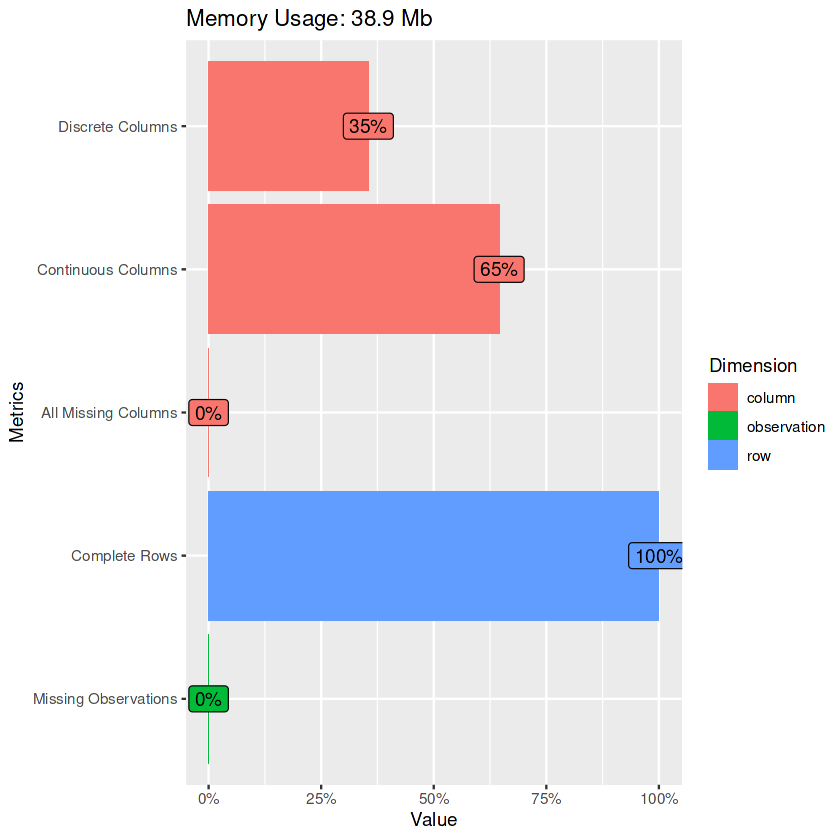

In [33]:
library(DataExplorer)
introduce(yt.data)
plot_intro(yt.data)

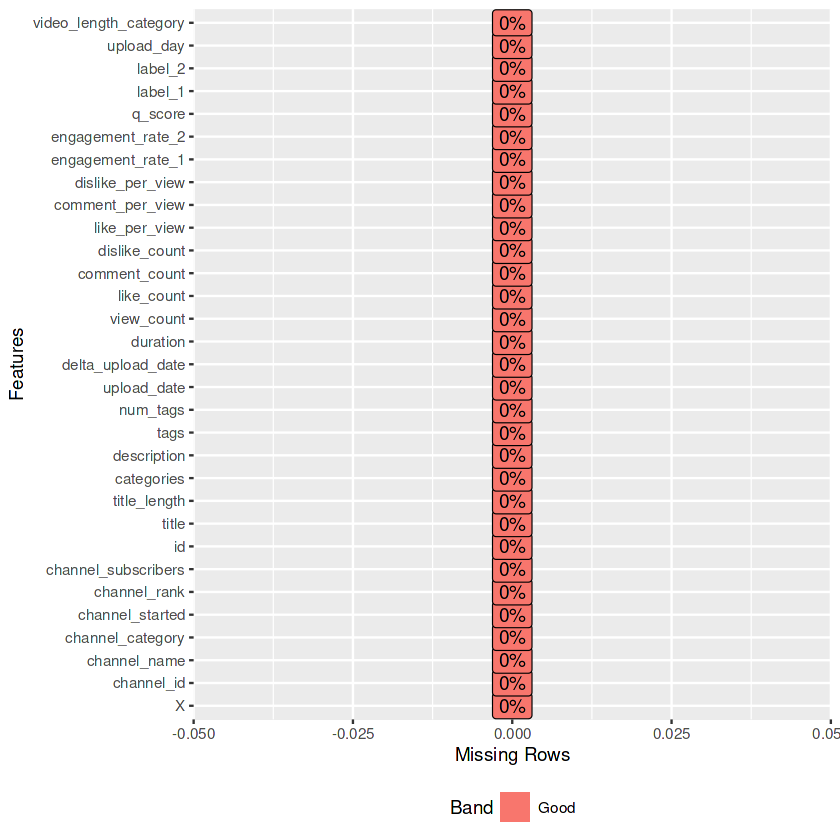

In [34]:
plot_missing(yt.data)
# plot_missing function is used to return and plot the frequency of missing values for each feature.


> The above plot describing that there is no missing values in the dataset

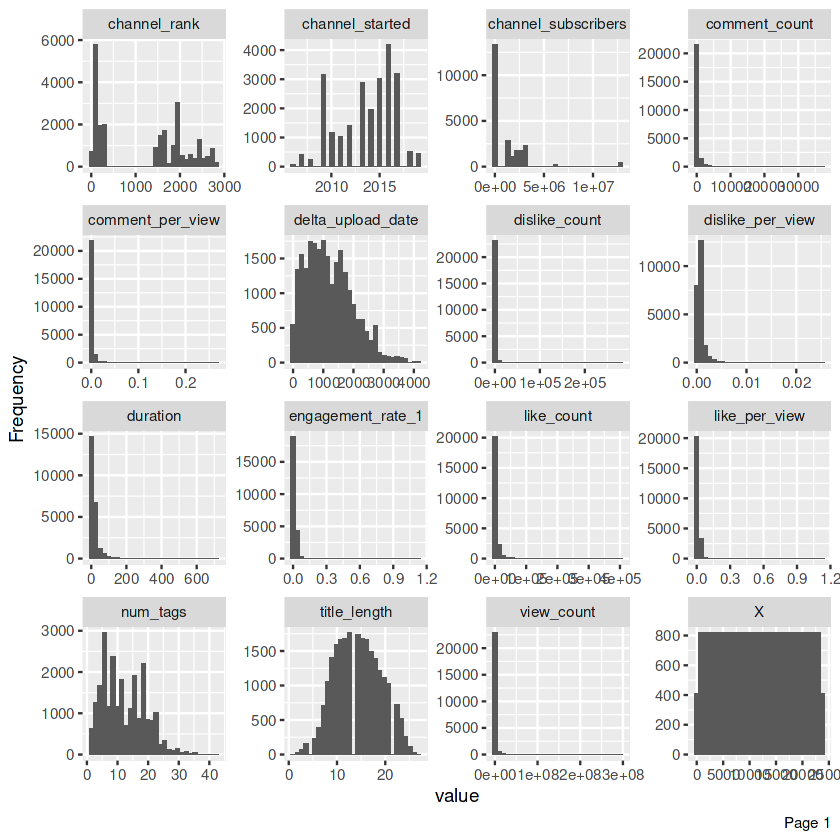

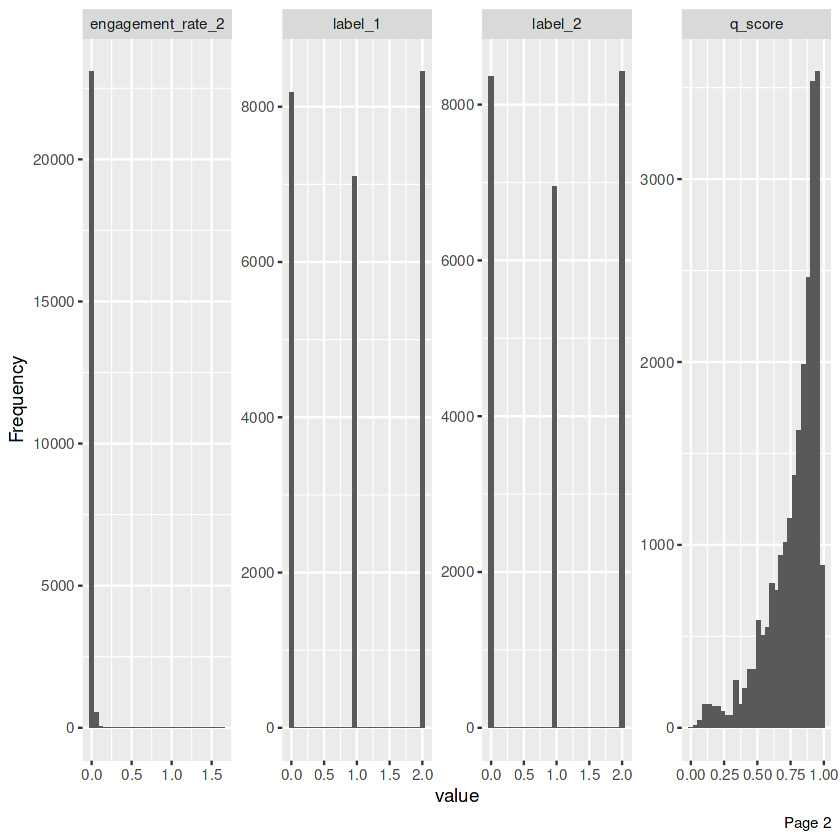

In [35]:
plot_histogram(yt.data) 
# plot the frequency of values for each variable

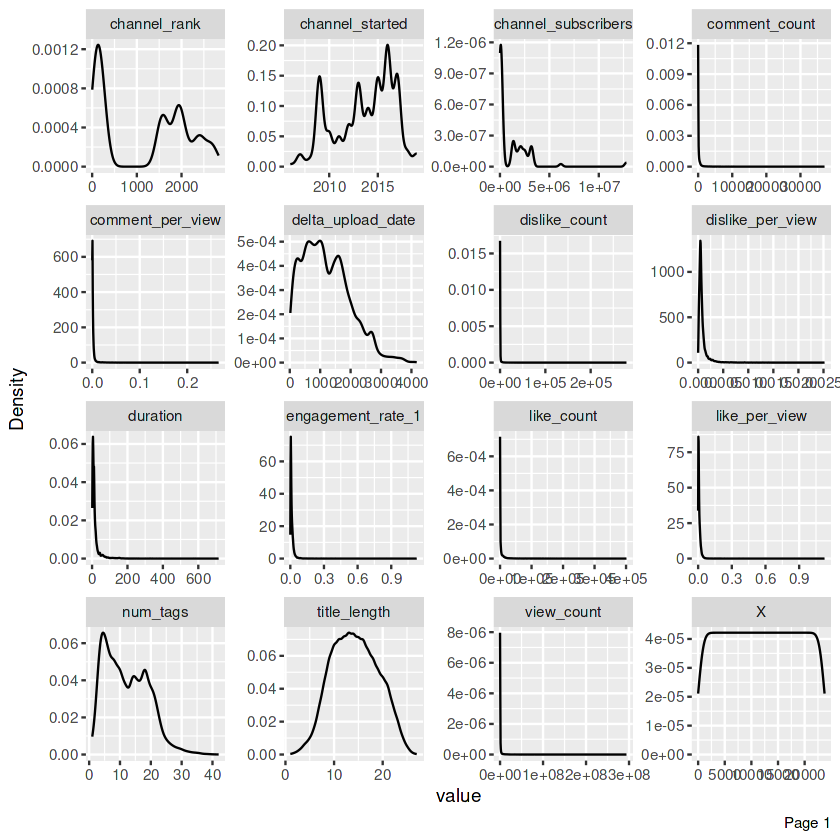

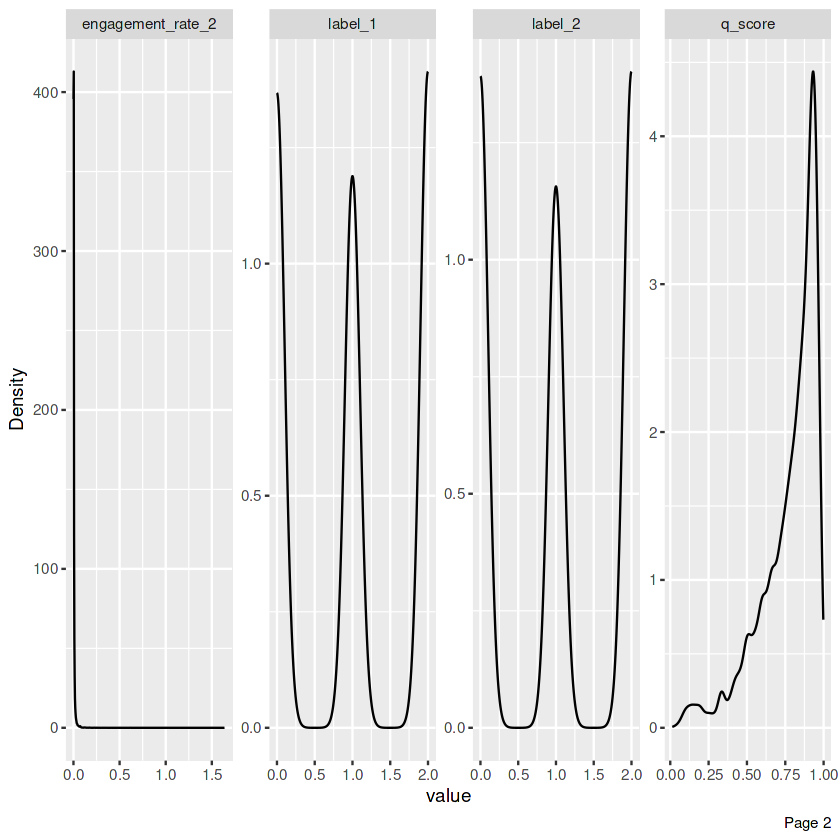

In [36]:
plot_density(yt.data)

> The shape of the curve tells you about the distribution of the data. If the curve is bell-shaped and symmetric, it suggests a normal distribution. If the curve is skewed to the right or left, it suggests a non-normal distribution. If the curve has multiple peaks, it suggests a bimodal or multimodal distribution.

> A density curve gives us a good idea of the “shape” of a distribution, including whether or not a distribution has one or more “peaks” of frequently occurring values and whether or not the distribution is skewed to the left or the right.

> A density curve lets us visually see where the mean and the median of a distribution are located.

# How to Interpret Density Curves

 < > Skewness
 Skewness is a way to describe the symmetry of a distribution. Density curves allow us to quickly see whether or not a graph is left skewed, right skewed,
 or has no skew.
 
 
 
 < > The location of the mean & median
  Depending on the skewness of a density curve, we can quickly know whether the mean or median is larger in a given distribution. In particular:

    !If a density curve is left skewed, then the mean is less than the median.
    !If a density curve is right skewed, then the mean is greater than the median.
    !If a density curve has no skew, then the mean is equal to the median.
    
    
 < > Number of Peaks
   Density curves also allow us to quickly see how many “peaks” there are in a given distribution.
        
        ! If One Peak -> unimodal Distribution
        ! If Two Peak -> bimodal Distribution
        ! If Three Peak -> multimodal Distribution


# Bivariate Analysis

# SCATTERPLOT INTERPRETAION

 ->Elements of Scatterplot
    
    !X-axis representing values of a continuous variable. By custom, this is the independent variable when you can classify one of the variables as such
    !Y-axis representing values of a continuous variable. Traditionally, this is the dependent variable.
    !Symbols plotted at the (X, Y) coordinates of your data. Optionally, the graph can use different colored/shaped symbols to represent separate groups on the same chart.
    
  ->X-Y correlation interpretation
  
    !Values tending to rise together indicate a **positive correlation**
    !if one variable increases as the other decreases, it’s a **negative correlation**
    
  ->Outliers are distanced from other data points  
  ![image](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2021/06/scatterplot_outlier2.png?w=576&ssl=1)  
  
  ->Stronger relationships produce a tighter clustering of data points
  
  ![image](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/05/flp_lowvar.png?w=576&ssl=1)
  ![image](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/05/flp_highvar.png?w=576&ssl=1)  
   
   NOTE --> Stronger relationships produce correlation coefficients closer to -1 and +1 and regression models that have higher R-squared values

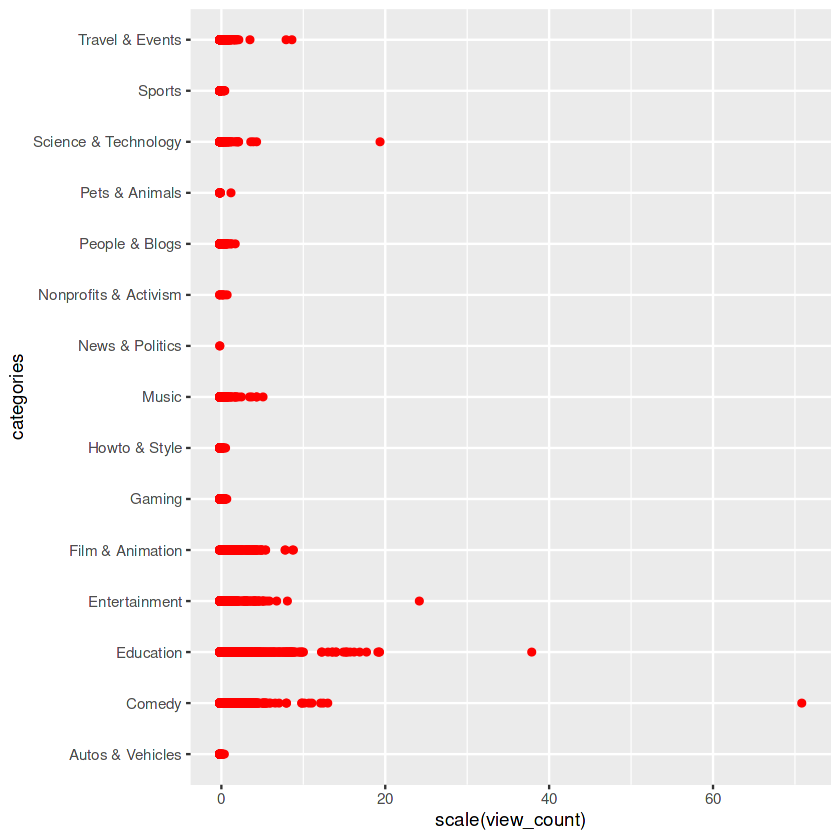

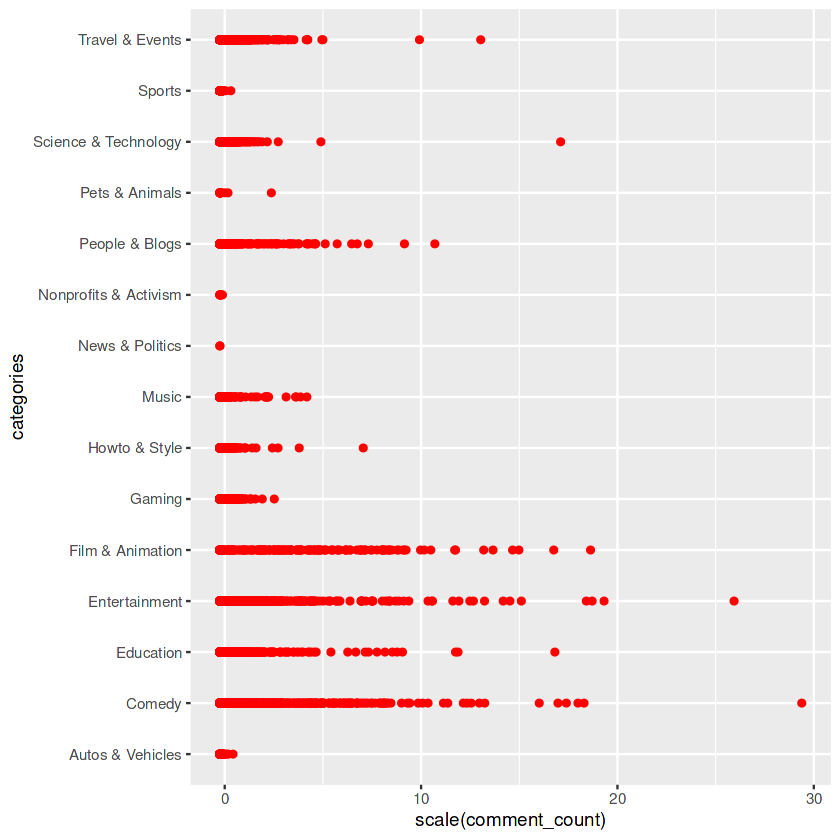

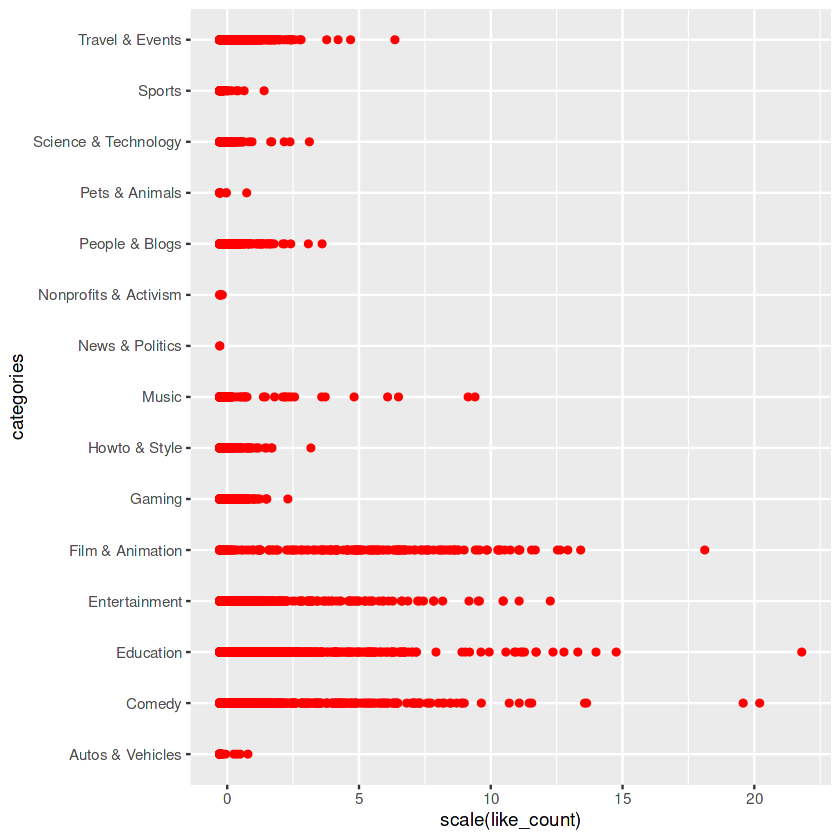

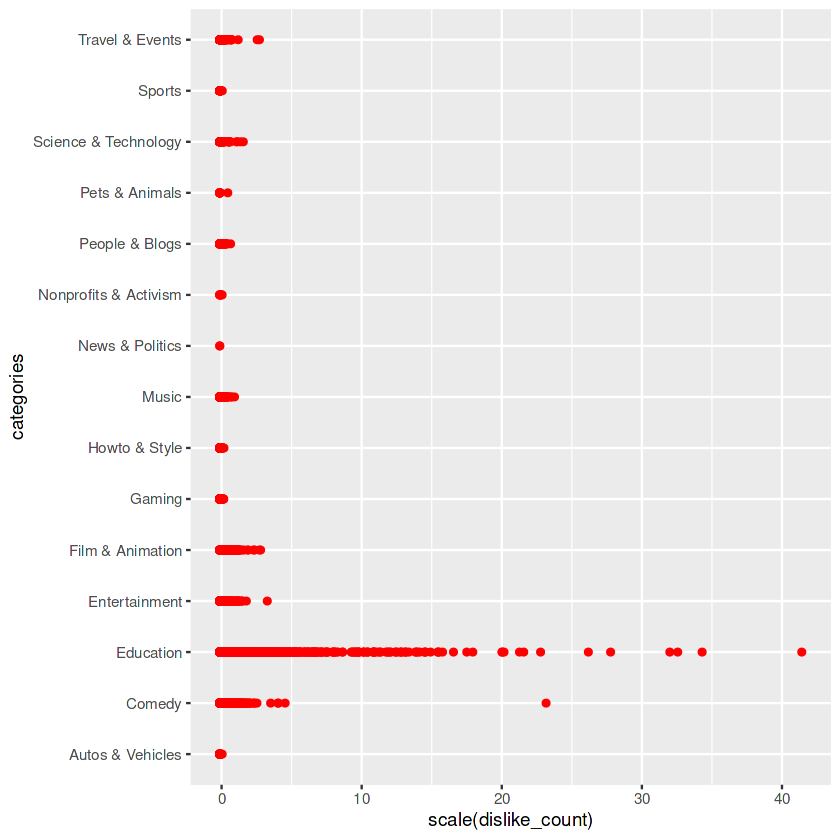

In [24]:
ggplot(yt.data, mapping= aes(x =scale(view_count), y=categories)) + geom_point(col="red")
ggplot(yt.data, mapping= aes(x =scale(comment_count), y=categories)) + geom_point(col="red")
ggplot(yt.data, mapping= aes(x =scale(like_count), y=categories)) + geom_point(col="red")
ggplot(yt.data, mapping= aes(x =scale(dislike_count), y=categories)) + geom_point(col="red")

# BOXPLOT INTERPRETATION

![IMAGE](https://www.wellbeingatschool.org.nz/sites/default/files/W@S_boxplot-labels.png)

>Median
The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.

>Inter-quartile range
The middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range.

>Upper quartile
Seventy-five percent of the scores fall below the upper quartile.

>Lower quartile
Twenty-five percent of scores fall below the lower quartile.

>Whiskers
The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.


>Skewed data
When data are skewed, the majority of the data are located on the high or low side of the graph. Skewness indicates that the data may not be normally distributed.

![image](https://support.minitab.com/en-us/minitab/20/media/generated-content/images/boxplot_rightskew.png)
![image](https://support.minitab.com/en-us/minitab/20/media/generated-content/images/boxplot_leftskew.png)

>The boxplot with right-skewed data shows wait times. Most of the wait times are relatively short, and only a few wait times are long. 
>The boxplot with left-skewed data shows failure time data. A few items fail immediately and many more items fail later.

>Outliers
Outliers, which are data values that are far away from other data values, can strongly affect your results. Often, outliers are easiest to identify on a boxplot.


![image](https://support.minitab.com/en-us/minitab/20/media/generated-content/images/boxplot_outlier.png)

On a boxplot, outliers are identified by asterisks (*).

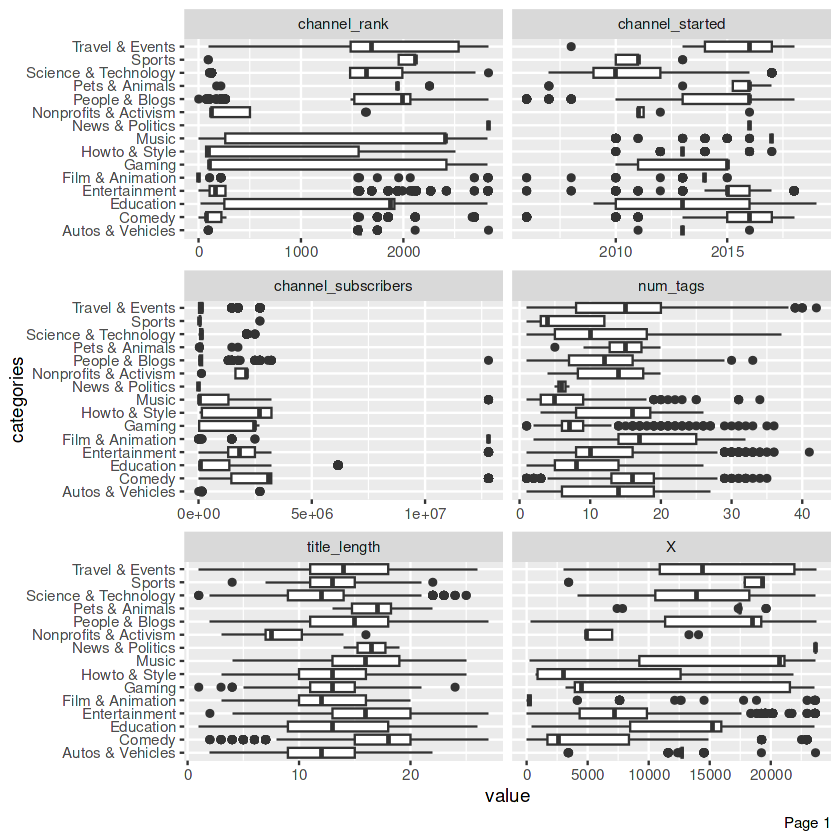

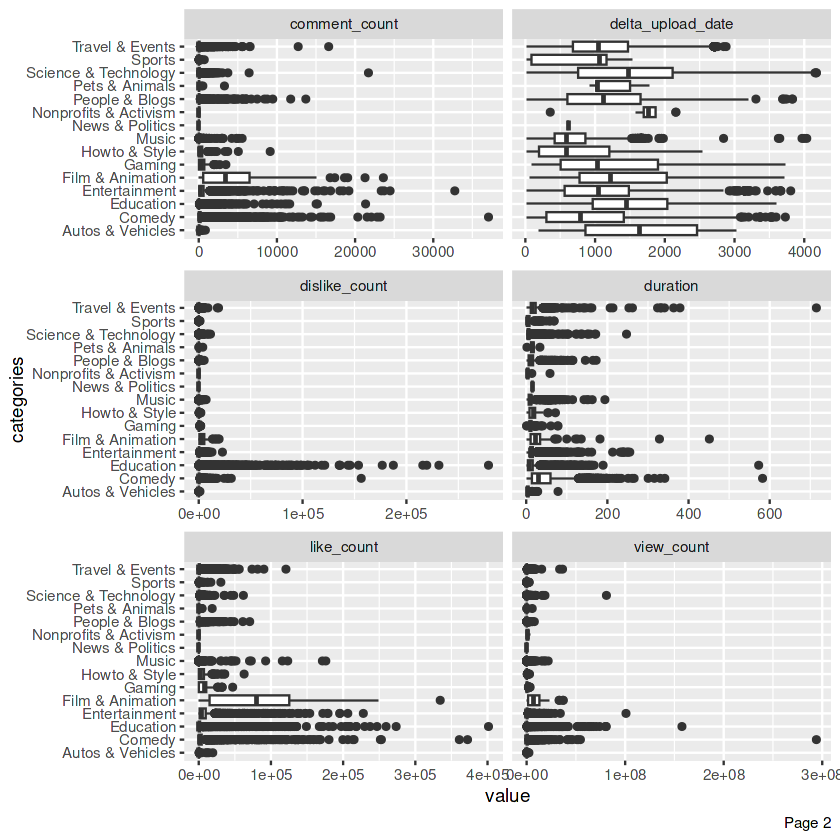

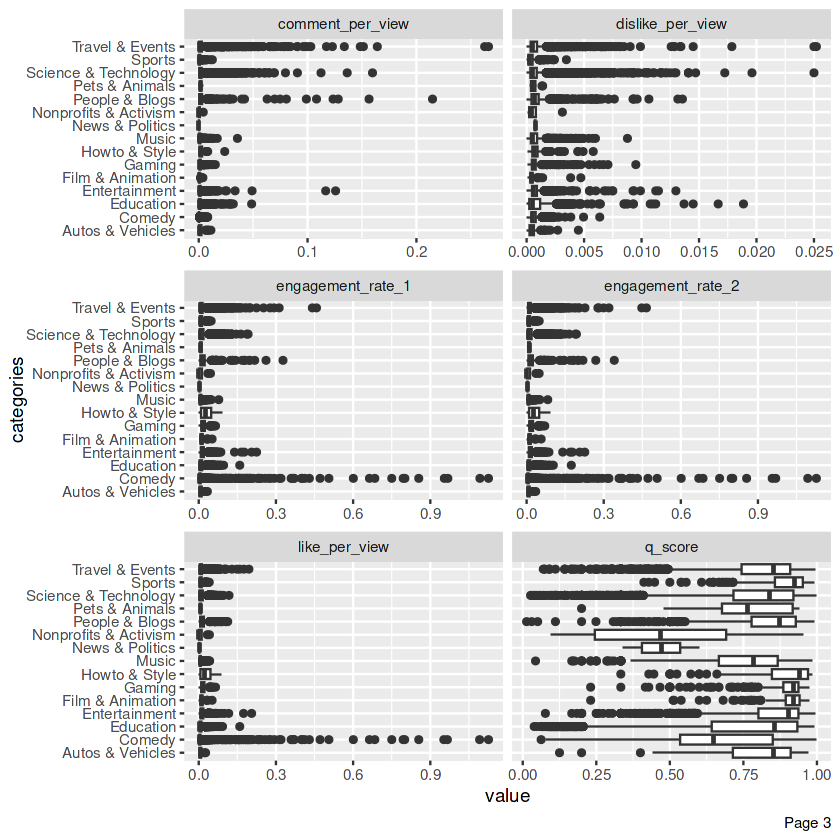

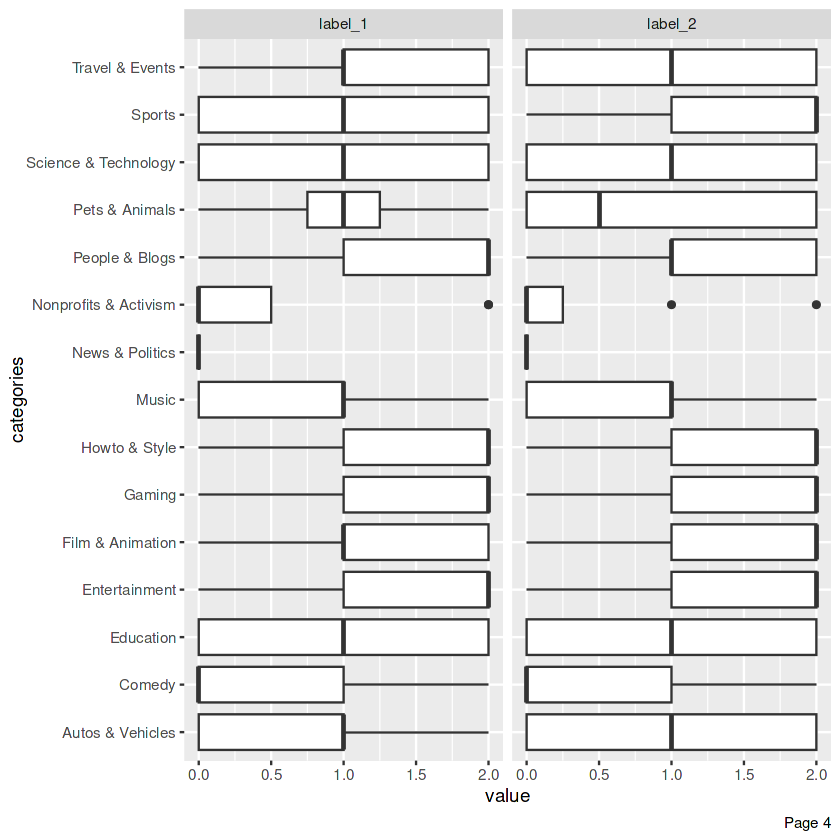

In [25]:
plot_boxplot(yt.data, by= 'categories',  ncol = 2)

# Understanding Correlations and Correlation Matrix

    >Correlation is the measure of how two or more variables are related to one another, also referred to as linear dependence
    
    !Positive and Negative Correlation
    
    !Positive Correlation
    Two variables X and Y are positively correlated if high values of X go with high values of Y and low values of X go with lower values of Y.
    
    !Negative Correlation
    Two variables are said to be negatively correlated if a high value of X goes with low values of Y and vice versa.
    
![image](https://muthu.co/wp-content/uploads/2021/05/Snip20210505_4.png)    

7 features with more than 20 categories ignored!
channel_id: 72 categories
channel_name: 72 categories
id: 23738 categories
title: 23521 categories
description: 19220 categories
tags: 21082 categories
upload_date: 3137 categories




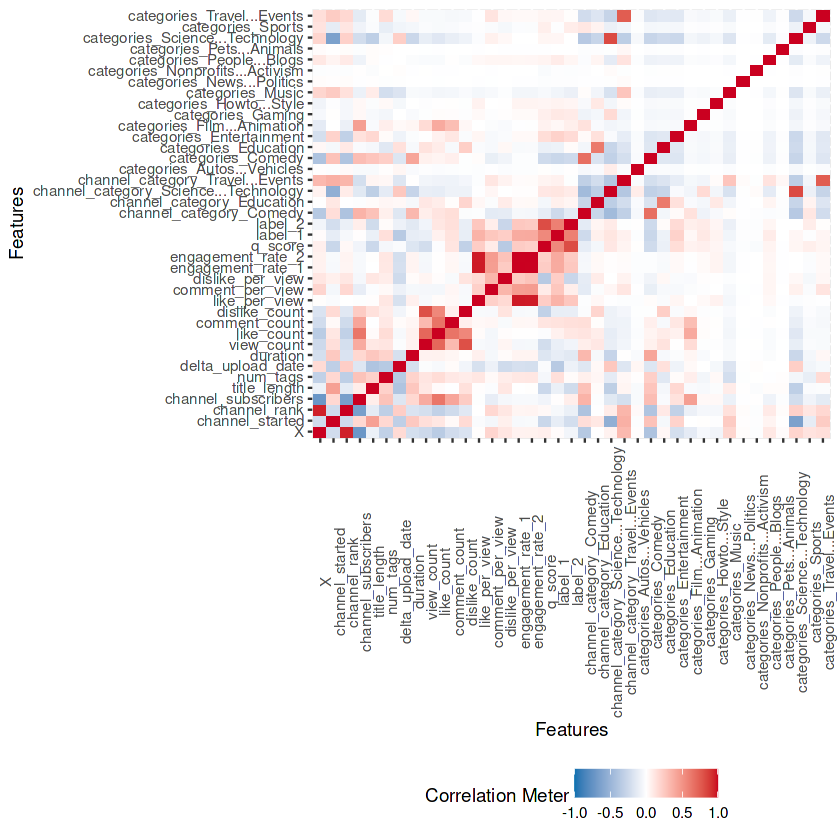

In [26]:
plot_correlation(yt.data, cor_args = list( 'use' = 'complete.obs'))

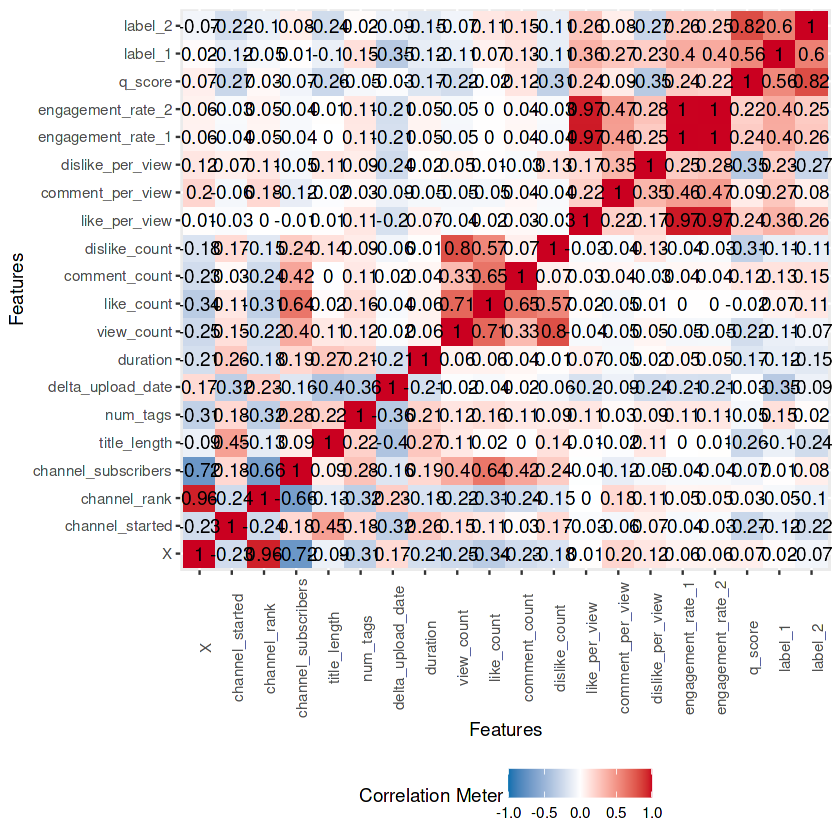

In [ ]:
plot_correlation(yt.data, type = 'c',cor_args = list( 'use' = 'complete.obs'))

# Categorical Analysis

7 columns ignored with more than 20 categories.
channel_id: 72 categories
channel_name: 72 categories
id: 23738 categories
title: 23521 categories
description: 19220 categories
tags: 21082 categories
upload_date: 3137 categories




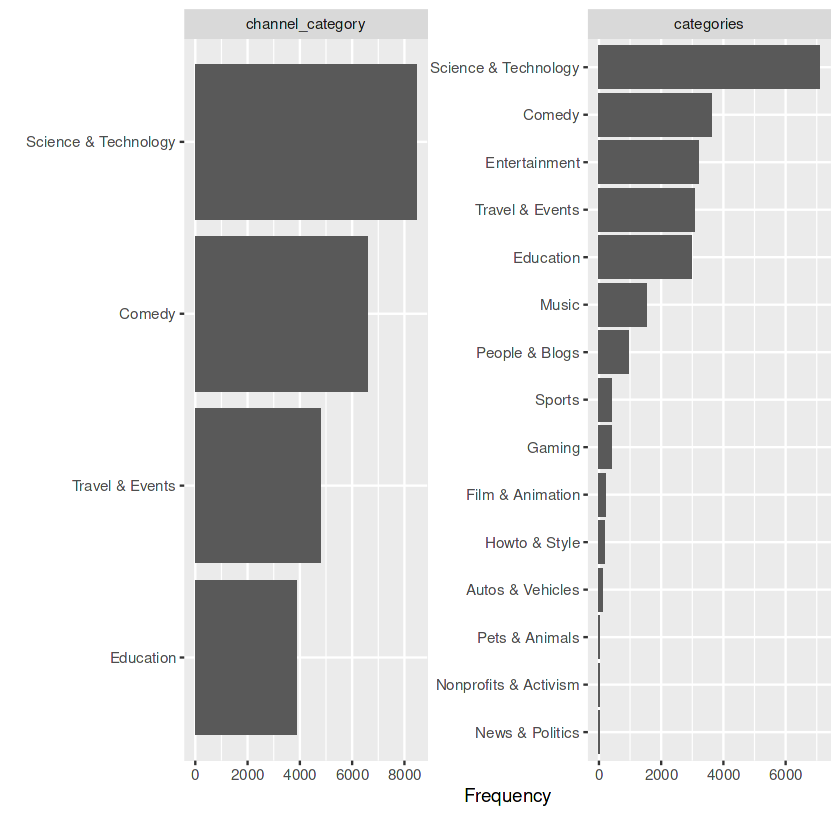

In [28]:
plot_bar(yt.data,maxcat = 20, parallel = TRUE)

7 columns ignored with more than 20 categories.
channel_id: 72 categories
channel_name: 72 categories
id: 23738 categories
title: 23521 categories
description: 19220 categories
tags: 21082 categories
upload_date: 3137 categories




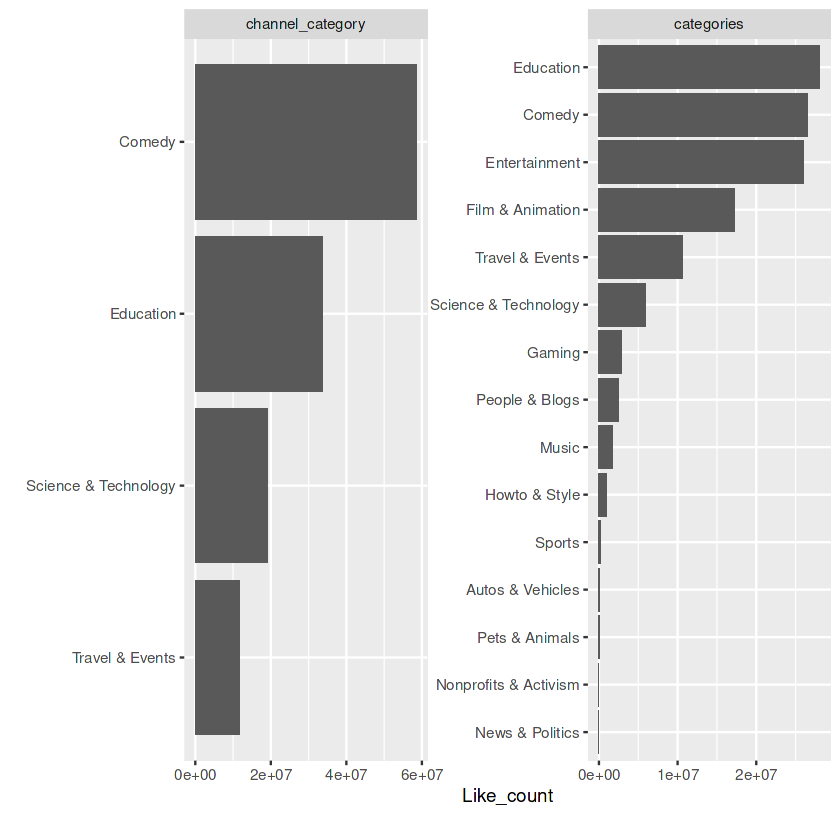

In [29]:
plot_bar(yt.data,with = c("like_count"), maxcat = 20, parallel = TRUE)


 Short Medium   Long 
 23723     14      1 

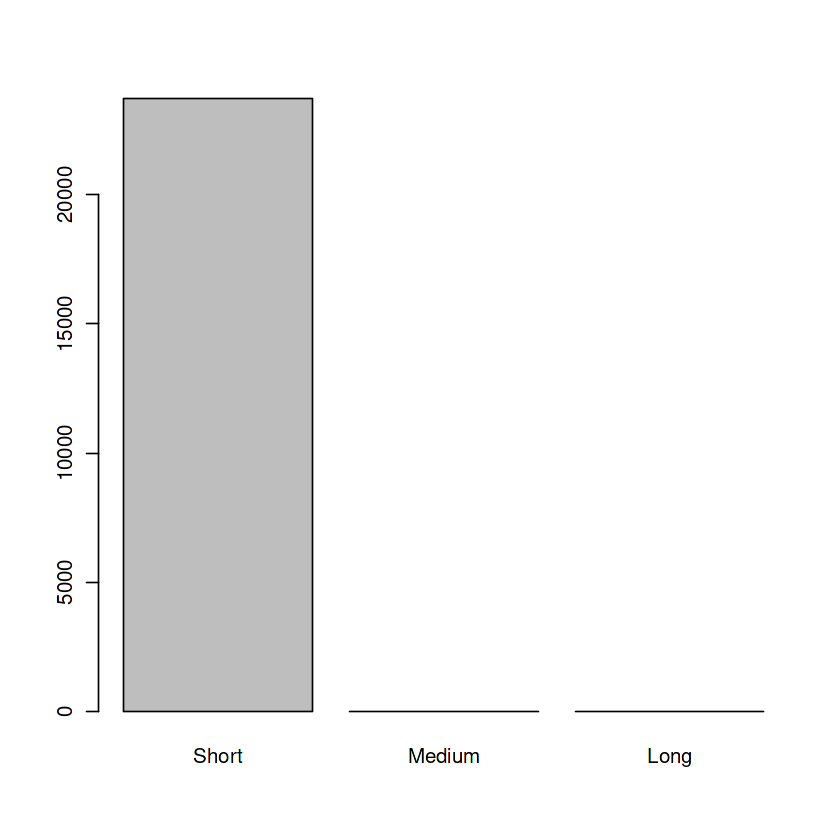

In [7]:
# head(yt.data)
table(yt.data$video_length_category)
plot(yt.data$video_length_category)

As the above graph is indicating that most of trend videos are short in nature

In [48]:
#barplot(yt.data$upload_day)
yt.data$upload_day %>% anyNA()
table(yt.data$upload_day)


[1] FALSE


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
     3483      3247      3469      2791      3537      3738      3473 

Table indicating no of videos published indivisual day 

In [53]:
colnames(yt.data)
head(yt.data)

[1] "X"                     "channel_id"            "channel_name"         
 [4] "channel_category"      "channel_started"       "channel_rank"         
 [7] "channel_subscribers"   "id"                    "title"                
[10] "title_length"          "categories"            "description"          
[13] "tags"                  "num_tags"              "upload_date"          
[16] "delta_upload_date"     "duration"              "view_count"           
[19] "like_count"            "comment_count"         "dislike_count"        
[22] "like_per_view"         "comment_per_view"      "dislike_per_view"     
[25] "engagement_rate_1"     "engagement_rate_2"     "q_score"              
[28] "label_1"               "label_2"               "upload_day"           
[31] "video_length_category"

,X,channel_id,channel_name,channel_category,channel_started,channel_rank,channel_subscribers,id,title,title_length,⋯,like_per_view,comment_per_view,dislike_per_view,engagement_rate_1,engagement_rate_2,q_score,label_1,label_2,upload_day,video_length_category
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<fct>
1,0,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,nehrVdADdH0,[FAP TV ] Thông Báo Tuyển Diễn Viên Nam Film Là Anh Phần 2,14,⋯,0.020731436,0.0024559372,0.0003118179,0.023187373,0.023499191,0.9703641,2,2,Monday,Short
2,1,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,K66wOEaBwK4,Phía Sau Một Cô Gái - Soobin Hoàng Sơn | MV Fanmade - FAPtv,14,⋯,0.010123703,0.0006222644,0.0002592118,0.010745968,0.011005180,0.9500696,1,2,Saturday,Short
3,2,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,D00vn3X7oI8,FAPtv Cơm Nguội: Tập 94 - Dấu Ấn Học Đường Phần 2,12,⋯,0.006007397,0.0002339762,0.0003264465,0.006241373,0.006567820,0.8969199,1,2,Saturday,Short
4,3,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G22G1k3G-kM,FAPtv Cơm Nguội: Tập 100 - Hành Trình Vui Vẻ,10,⋯,0.007931219,0.0002281653,0.0002867694,0.008159384,0.008446154,0.9302093,1,2,Wednesday,Short
5,4,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G5EG7ymPErw,FAPtv Cơm Nguội: Tập 95 - Dấu Ấn Học Đường Phần Cuối,12,⋯,0.006485225,0.0003033928,0.0002771582,0.006788618,0.007065776,0.9180294,1,2,Friday,Short
6,5,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,vrygmNKYovo,Là Anh Bonus: Phim Ngắn - Lần Đầu | Hi Team - FAPtv,13,⋯,0.009460696,0.0010258188,0.0013958178,0.010486514,0.011882332,0.7428608,1,0,Saturday,Short


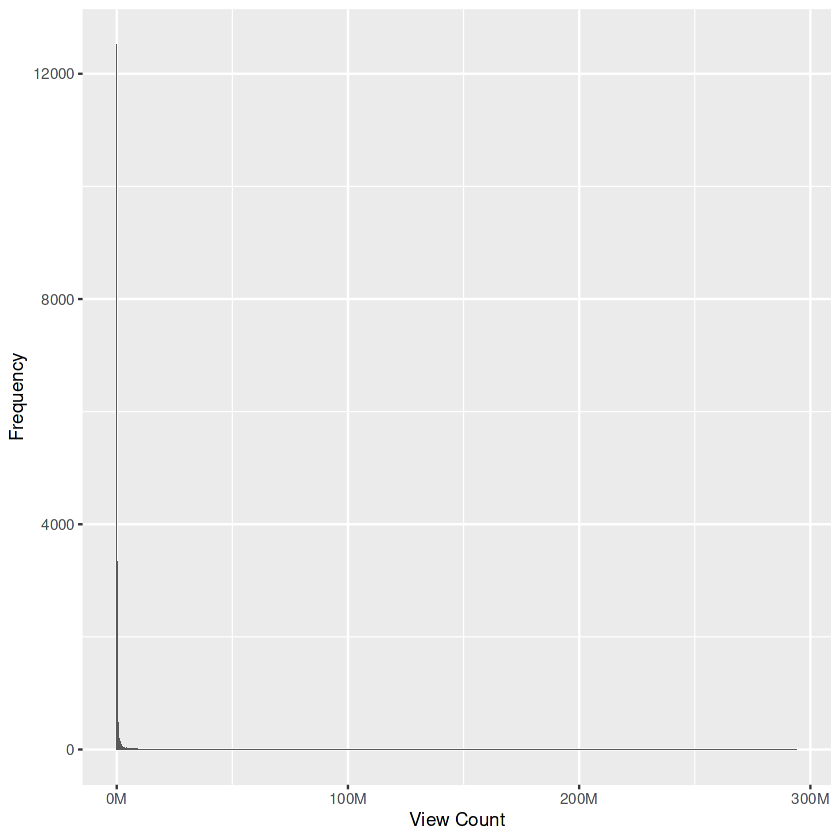

In [41]:
# Histogram of view counts
ggplot(yt.data, aes(view_count)) + 
  geom_histogram(binwidth = 100000) + 
  scale_x_continuous(labels = label_number(scale = 1e-6, accuracy = 1, suffix = "M")) + 
  xlab("View Count") + 
  ylab("Frequency")

In [32]:
colnames(yt.data)

[1] "X"                   "channel_id"          "channel_name"       
 [4] "channel_category"    "channel_started"     "channel_rank"       
 [7] "channel_subscribers" "id"                  "title"              
[10] "title_length"        "categories"          "description"        
[13] "tags"                "num_tags"            "upload_date"        
[16] "delta_upload_date"   "duration"            "view_count"         
[19] "like_count"          "comment_count"       "dislike_count"      
[22] "like_per_view"       "comment_per_view"    "dislike_per_view"   
[25] "engagement_rate_1"   "engagement_rate_2"   "q_score"            
[28] "label_1"             "label_2"

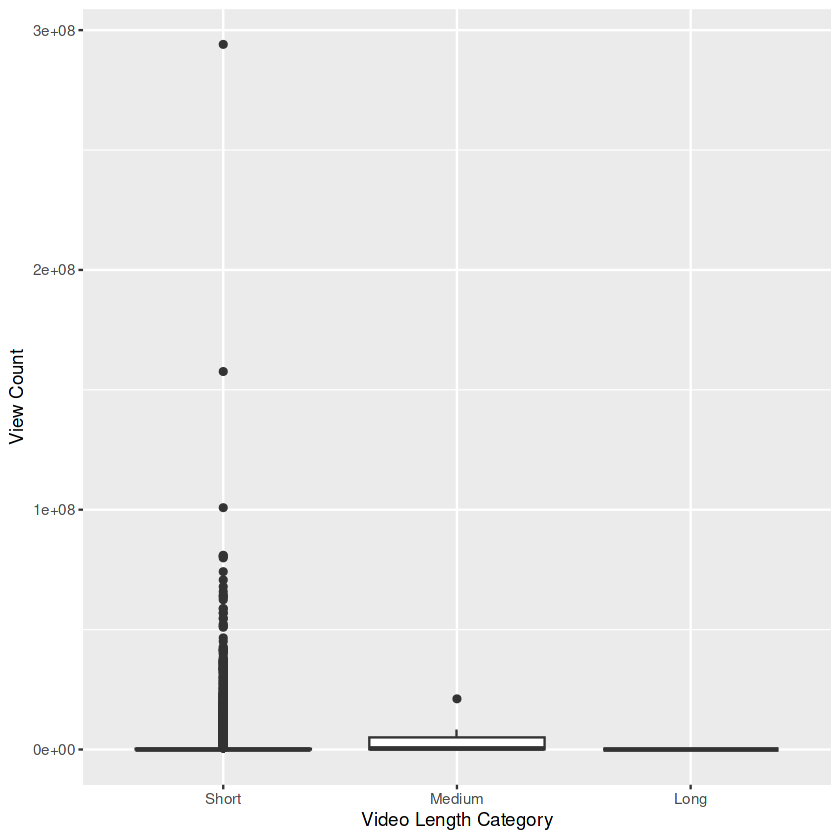

In [42]:
# Boxplot of view counts by video length category
ggplot(yt.data, aes(x = video_length_category, y = view_count)) + 
  geom_boxplot() + 
  xlab("Video Length Category") + 
  ylab("View Count")

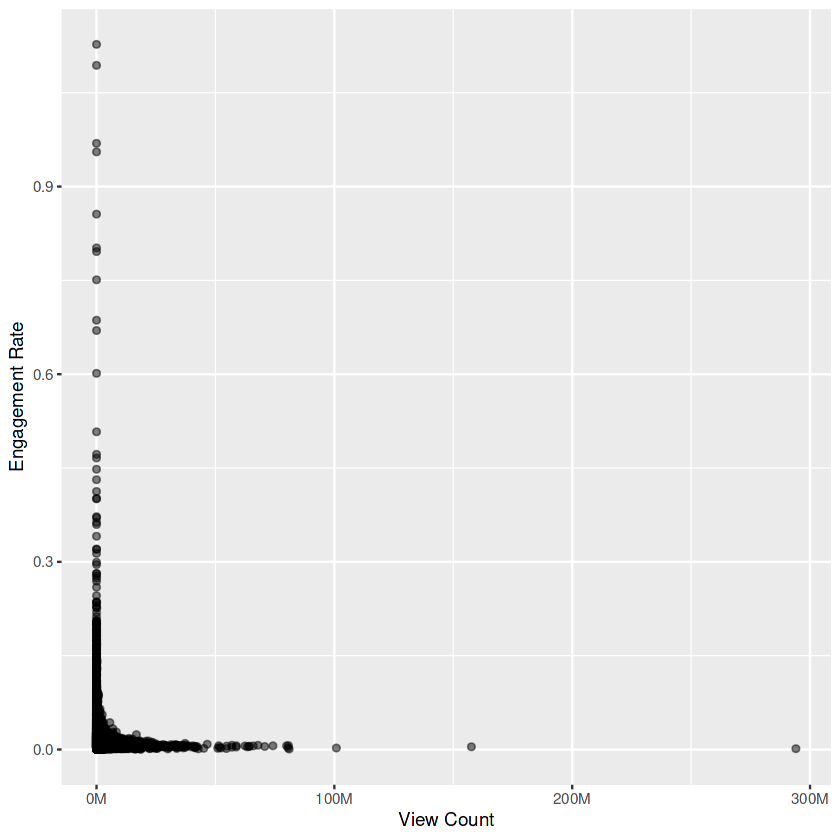

In [43]:

# Scatterplot of view counts vs. engagement rate
ggplot(yt.data, aes(view_count, engagement_rate_1)) + 
  geom_point(alpha = 0.5) +
scale_x_continuous(labels = label_number(scale = 1e-6, accuracy = 1, suffix = "M")) + 
  xlab("View Count") + 
  ylab("Engagement Rate")

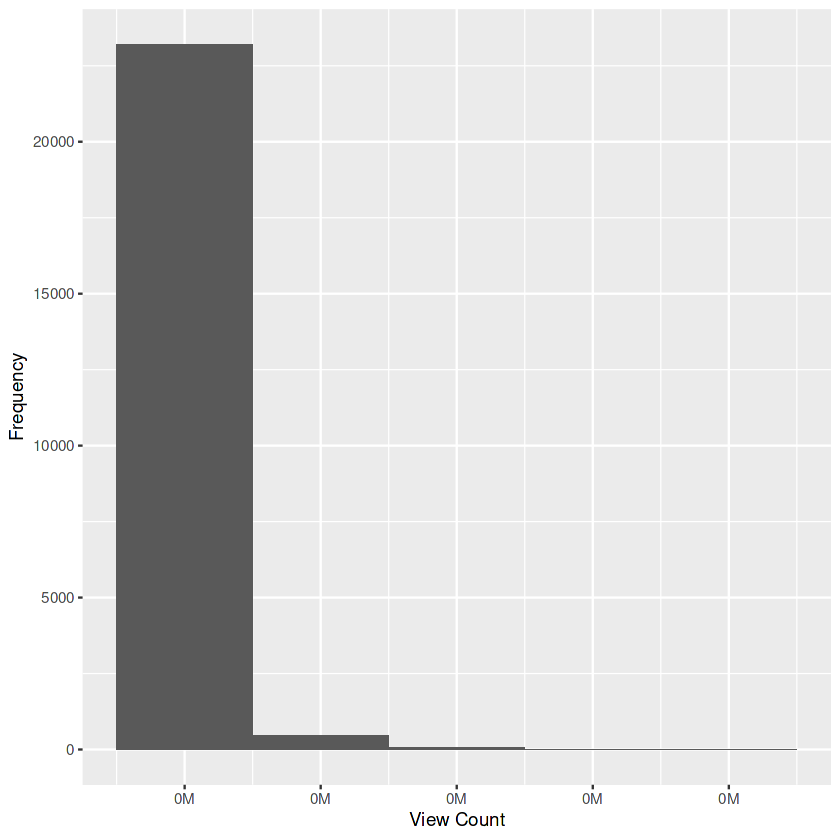

In [46]:
# Histogram of view counts
ggplot(yt.data, aes(like_count)) + 
  geom_histogram(binwidth = 100000) + 
  scale_x_continuous(labels = label_number(scale = 1e-6, accuracy = 1, suffix = "M")) + 
  xlab("View Count") + 
  ylab("Frequency")

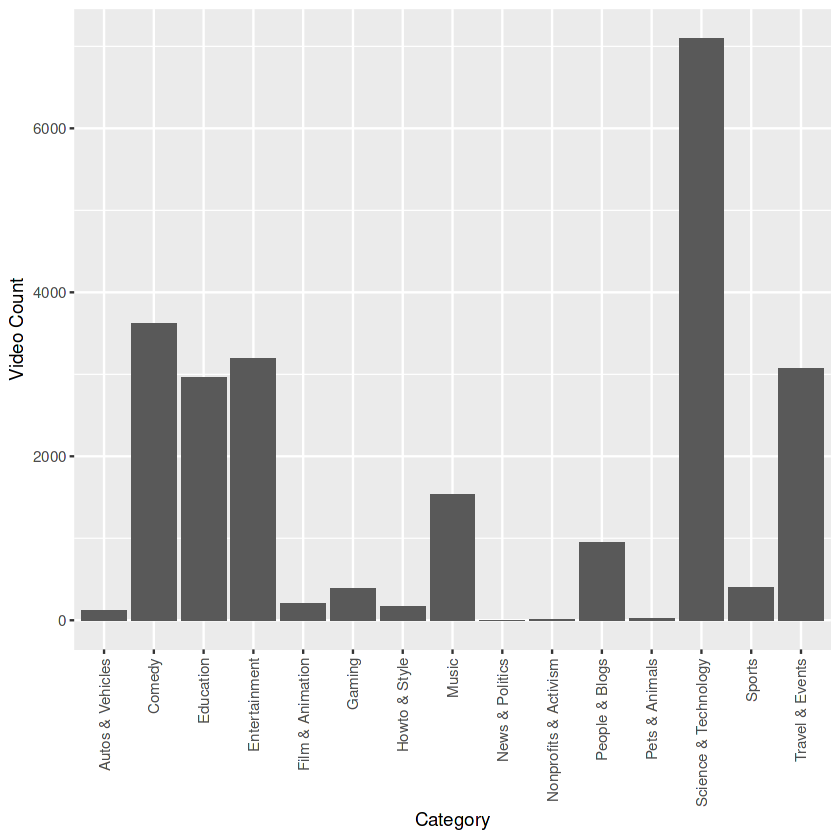

In [47]:
# Bar chart of video counts by category
ggplot(yt.data, aes(categories)) + 
  geom_bar() + 
  xlab("Category") + 
  ylab("Video Count") + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

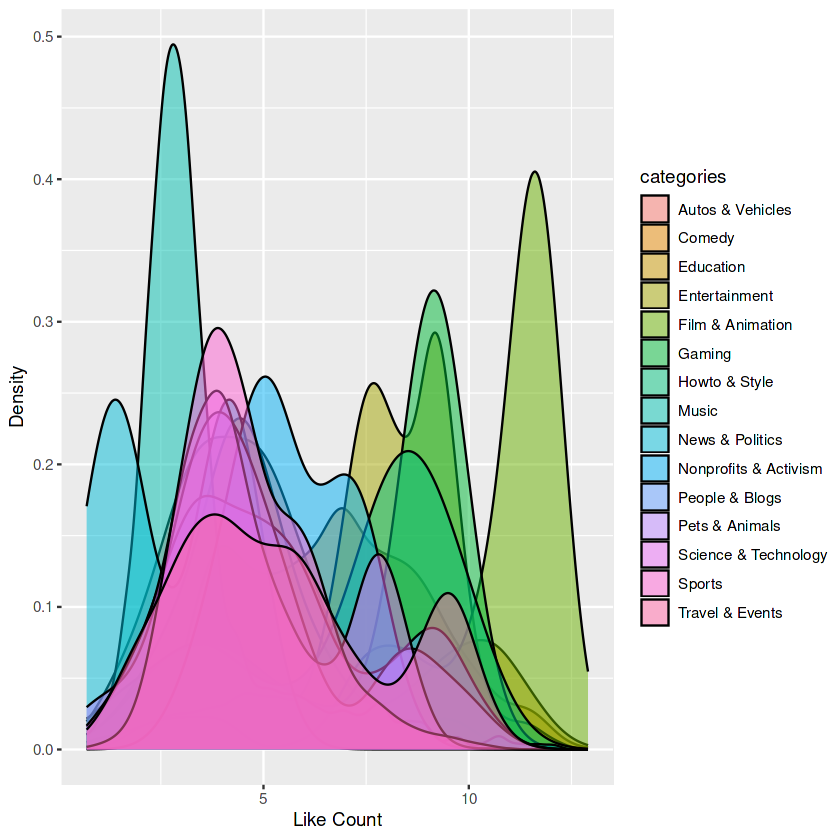

In [48]:
# Density plot of like counts by category
ggplot(yt.data, aes(x = log(like_count), fill = categories)) + 
  geom_density(alpha = 0.5) + 
  xlab("Like Count") + 
  ylab("Density")

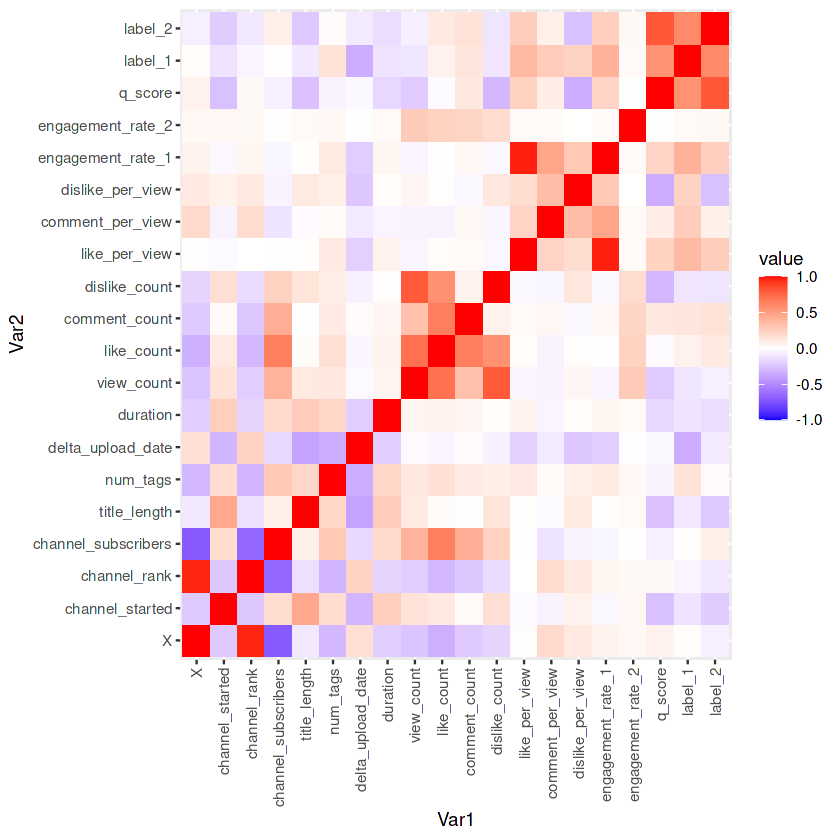

In [50]:
library(reshape2)
# Heatmap of correlations between numeric variables
numeric_cols <- sapply(yt.data, is.numeric)
corr_matrix <- cor(yt.data[, numeric_cols])
ggplot(data = melt(corr_matrix), aes(Var1, Var2, fill = value)) + 
  geom_tile() + 
  scale_fill_gradient2(low = "blue", high = "red", midpoint = 0, limit = c(-1,1)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

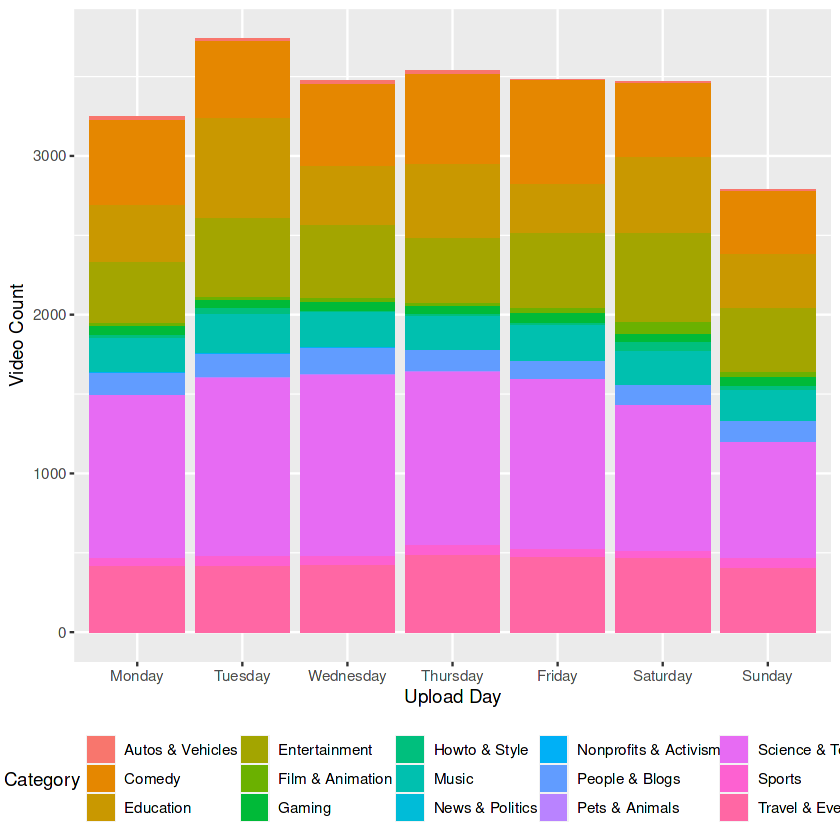

In [51]:
yt.data$upload_day <- factor(yt.data$upload_day, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
ggplot(yt.data, aes(x = upload_day, fill = categories)) + 
  geom_bar() + 
  xlab("Upload Day") + 
  ylab("Video Count") + 
  theme(legend.position = "bottom") + 
  labs(fill = "Category")

In [29]:
colnames(yt.data)

[1] "X"                     "channel_id"            "channel_name"         
 [4] "channel_category"      "channel_started"       "channel_rank"         
 [7] "channel_subscribers"   "id"                    "title"                
[10] "title_length"          "categories"            "description"          
[13] "tags"                  "num_tags"              "upload_date"          
[16] "delta_upload_date"     "duration"              "view_count"           
[19] "like_count"            "comment_count"         "dislike_count"        
[22] "like_per_view"         "comment_per_view"      "dislike_per_view"     
[25] "engagement_rate_1"     "engagement_rate_2"     "q_score"              
[28] "label_1"               "label_2"               "upload_day"           
[31] "video_length_category"

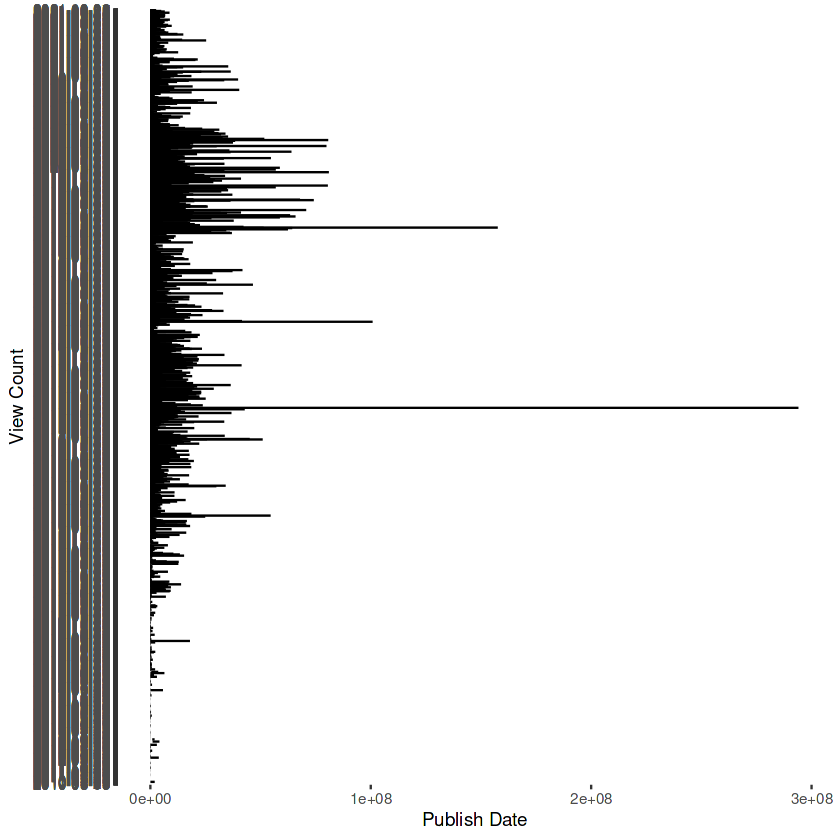

In [34]:
#Line chart of views over time
ggplot(yt.data, aes(y = upload_date, x = view_count)) +
geom_line() +
xlab("Publish Date") +
ylab("View Count")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



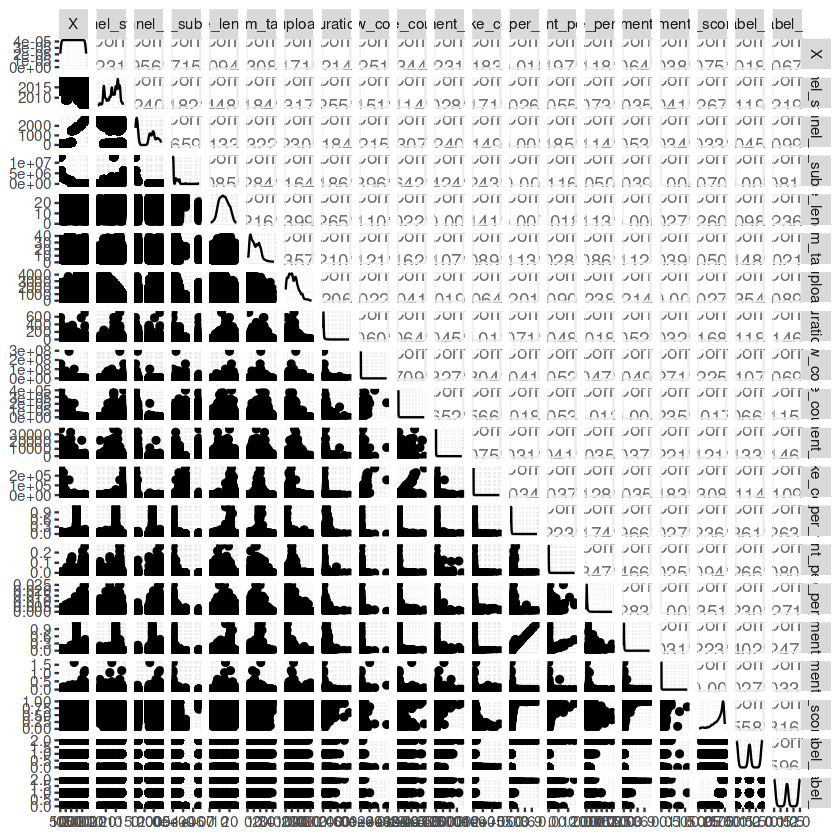

In [52]:
library(GGally)
ggpairs(yt.data[, numeric_cols], axisLabels = "show")

# **STATICAL TESTING**

In [36]:
# Formulate the hypothesis that there is a significant difference in the mean view counts between different categories of videos
# H0: The mean view counts are the same for all categories
# Ha: At least one pair of mean view counts are different

# Perform ANOVA test
model <- lm(view_count ~ categories, data = yt.data)
anova_result <- anova(model)

# Print the ANOVA table
print(anova_result)

# Check if the p-value is less than the significance level (e.g. 0.05) to reject the null hypothesis
if(anova_result$`Pr(>F)` < 0.05) {
  cat("\nThere is a significant difference in the mean view counts between different categories of videos.\n")
} else {
  cat("\nThere is no significant difference in the mean view counts between different categories of videos.\n")
}
#In this code, we first load the yt.data dataset. Then, we formulate the hypothesis that there is a significant difference in the mean view counts between different categories of videos. We specify the null hypothesis (H0) and the alternative hypothesis (Ha). We then perform an ANOVA test using the lm() function in R, which fits a linear model of view_count ~ categories to the data. Finally, we print the ANOVA table and check if the p-value is less than the significance level (e.g. 0.05) to reject the null hypothesis. If the p-value is less than the significance level, we conclude that there is a significant difference in the mean view counts between different categories

Analysis of Variance Table

Response: view_count
              Df     Sum Sq    Mean Sq F value    Pr(>F)    
categories    14 2.4428e+16 1.7448e+15  108.25 < 2.2e-16 ***
Residuals  23723 3.8238e+17 1.6118e+13                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Warning message in if (anova_result$`Pr(>F)` < 0.05) {:
“the condition has length > 1 and only the first element will be used”



There is a significant difference in the mean view counts between different categories of videos.


# INTERPRETATION RESULT FOR ANOVA TEST

* Df: This column shows the degrees of freedom for each source of variance. In this case, there are two sources of variance: categories and Residuals. The  degrees of freedom for the categories factor is 14, which means there were 15 total groups (since there were 15 levels in the categories variable) and one degree of freedom was lost to estimate the overall mean. The degrees of freedom for the Residuals factor is 23,723, which represents the total number of observations minus the number of groups and one degree of freedom.

* Sum Sq: This column shows the sum of squares for each source of variance. The sum of squares for categories is 2.4428e+16, which represents the total variability in view_count that can be explained by the categories variable. The sum of squares for Residuals is 3.8238e+17, which represents the unexplained variability in view_count

* Mean Sq: This column shows the mean square for each source of variance. The mean square is calculated by dividing the sum of squares by the degrees of freedom. The mean square for categories is 1.7448e+15, which represents the average variability in view_count that can be explained by the categories variable. The mean square for Residuals is 1.6118e+13, which represents the average unexplained variability in view_count

* F value: This column shows the F-statistic for the test. The F-statistic is calculated by dividing the mean square for the categories factor by the mean square for the Residuals factor. The F-value for categories is 108.25, which indicates that the variability in view_count explained by the categories variable is significantly larger than the variability that cannot be explained by the categories variable

* Pr(>F): This column shows the p-value for the test. The p-value represents the probability of observing an F-statistic as extreme as the one calculated, assuming that the null hypothesis (that there is no difference between the means of the groups) is true. In this case, the p-value is less than 2.2e-16, which is extremely small. This indicates that there is strong evidence against the null hypothesis and that the differences in view_count between the categories groups are statistically significant. The *** symbol next to the p-value indicates that the result is highly significant at the 0.001 level.

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


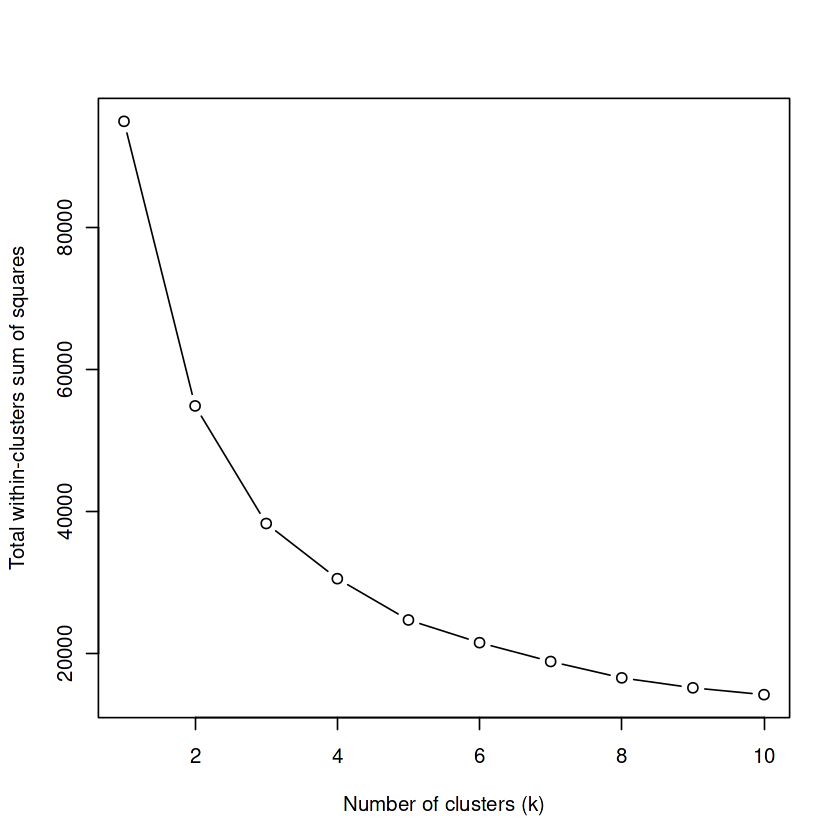

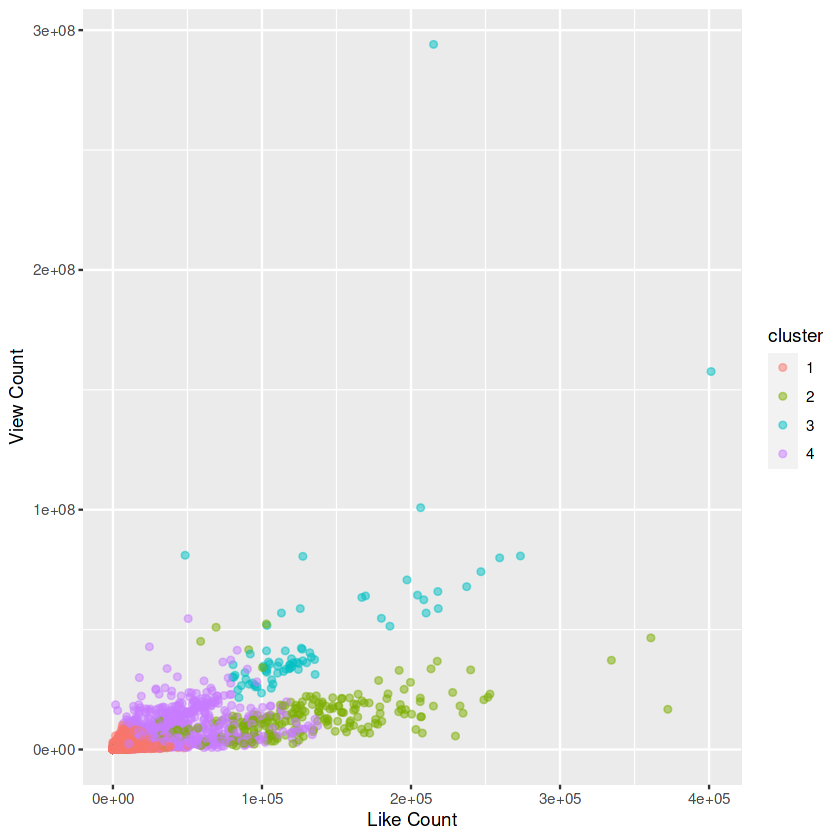

In [65]:
#Cluster Performing 

# Select the variables for clustering
cluster_vars <- yt.data[, c("like_count", "dislike_count", "view_count", "comment_count")]

# Standardize the variables
scaled_vars <- scale(cluster_vars)

# Determine the optimal number of clusters using elbow method
wss <- sapply(1:10, function(k) {
  kmeans(scaled_vars, k, nstart=10)$tot.withinss
})

plot(1:10, wss, type="b", xlab="Number of clusters (k)", ylab="Total within-clusters sum of squares")

# Fit the K-means clustering model with optimal number of clusters
k <- 4
set.seed(123)
kmeans_model <- kmeans(scaled_vars, centers=k, nstart=25)

# Add the cluster labels to the original data frame
yt.data$cluster <- as.factor(kmeans_model$cluster)

# Visualize the clusters
library(ggplot2)
ggplot(yt.data, aes(x=like_count, y=view_count, color=cluster)) + 
  geom_point(alpha=0.5) + 
  xlab("Like Count") + 
  ylab("View Count")

> The code performs cluster analysis on a dataset containing information about YouTube videos. It selects four variables, namely like_count, dislike_count, view_count, and comment_count, for clustering and standardizes them. Then, it determines the optimal number of clusters using the elbow method and plots the total within-clusters sum of squares against the number of clusters. The plot helps in determining the optimal number of clusters to be used in the k-means clustering algorithm.

> After determining the optimal number of clusters, which is four in this case, the k-means clustering model is fitted to the standardized data with 25 random starts. The resulting cluster labels are added to the original data frame as a factor variable. Finally, the clusters are visualized using a scatter plot of view_count against like_count, with each cluster represented by a different color.

In [71]:
colnames(yt.data)

[1] "X"                     "channel_id"            "channel_name"         
 [4] "channel_category"      "channel_started"       "channel_rank"         
 [7] "channel_subscribers"   "id"                    "title"                
[10] "title_length"          "categories"            "description"          
[13] "tags"                  "num_tags"              "upload_date"          
[16] "delta_upload_date"     "duration"              "view_count"           
[19] "like_count"            "comment_count"         "dislike_count"        
[22] "like_per_view"         "comment_per_view"      "dislike_per_view"     
[25] "engagement_rate_1"     "engagement_rate_2"     "q_score"              
[28] "label_1"               "label_2"               "upload_day"           
[31] "video_length_category" "cluster"

ERROR: Error in after_stat(): argument "x" is missing, with no default


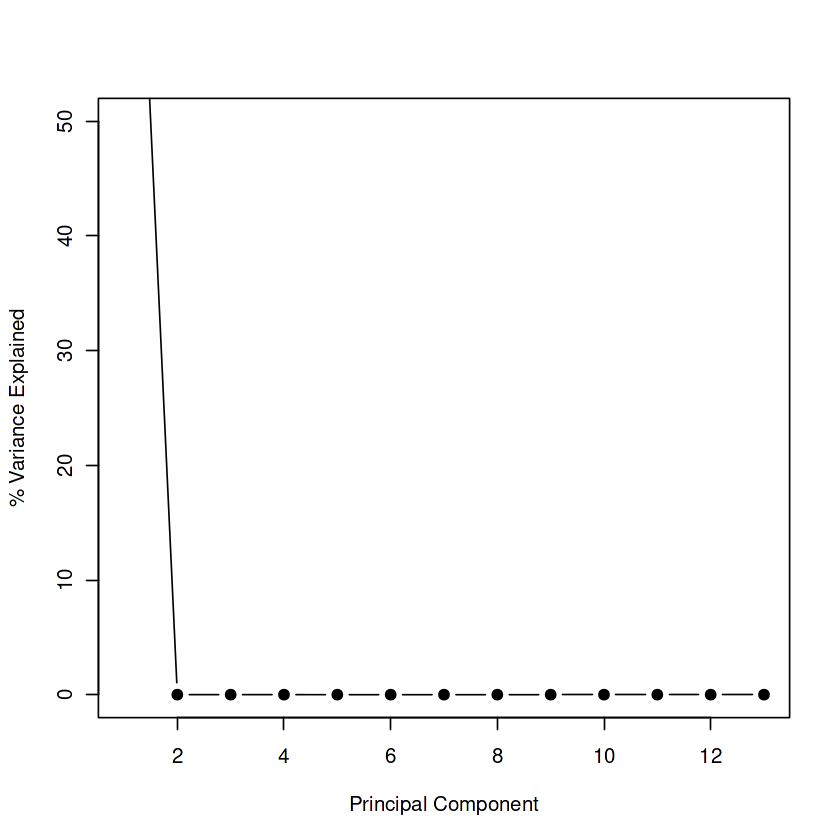

In [77]:
library(dplyr)
library(ggplot2)
library(stats)

# Select variables for PCA
vars_pca <- yt.data %>% 
  select(-c(channel_id, channel_name, channel_category, channel_started, 
            channel_rank, channel_subscribers, id, title, categories, 
            description, tags, upload_date, delta_upload_date, duration, 
            label_1, label_2, upload_day, video_length_category, cluster))

# Perform PCA
pca_res <- prcomp(vars_pca)

# Scree plot to determine the number of principal components to retain
pca_var <- pca_res$sdev^2
pca_var_percent <- pca_var/sum(pca_var) * 100
plot(pca_var_percent, xlab = "Principal Component", ylab = "% Variance Explained", 
     ylim = c(0, 50), type = "b", pch = 19)

# Biplot to visualize the first two principal components
pca_loadings <- pca_res$rotation[,1:2]
pca_scores <- pca_res$x[,1:2]
var_labels <- names(vars_pca)
ggplot(data = data.frame(pca_scores), aes(x = PC1, y = PC2)) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_vline(xintercept = 0, linetype = "dashed") +
  geom_point(size = 3, mapping=aes(col=cluster), after_stat()) +
  geom_text(aes(label = id), hjust = 1.2, vjust = 1.2) +
  geom_segment(aes(x = 0, y = 0, xend = pca_loadings[,1], yend = pca_loadings[,2], 
                   color = var_labels)) +
  geom_text(aes(x = pca_loadings[,1], y = pca_loadings[,2], label = var_labels), 
            hjust = -0.2, vjust = -0.2, size = 3) +
  xlab(paste("PC1 (", round(pca_var_percent[1], 1), "%)", sep = "")) +
  ylab(paste("PC2 (", round(pca_var_percent[2], 1), "%)", sep = "")) +
  scale_color_manual(values = c("blue", "red", "green", "purple", "orange", "pink"))


In [10]:
dim(yt.data)
colnames(yt.data)

[1] 23738    31

[1] "X"                     "channel_id"            "channel_name"         
 [4] "channel_category"      "channel_started"       "channel_rank"         
 [7] "channel_subscribers"   "id"                    "title"                
[10] "title_length"          "categories"            "description"          
[13] "tags"                  "num_tags"              "upload_date"          
[16] "delta_upload_date"     "duration"              "view_count"           
[19] "like_count"            "comment_count"         "dislike_count"        
[22] "like_per_view"         "comment_per_view"      "dislike_per_view"     
[25] "engagement_rate_1"     "engagement_rate_2"     "q_score"              
[28] "label_1"               "label_2"               "upload_day"           
[31] "video_length_category"

In [ ]:
library(stats)

mds_data <- yt.data[, c("view_count", "like_count", "comment_count", "dislike_count")]
mds_data_norm <- apply(mds_data, 2, function(x) (x - min(x)) / (max(x) - min(x)))
mds_result <- cmdscale(dist(mds_data_norm), eig = TRUE, k = 2)
plot(mds_result$points, col = yt.data$cluster, pch = 19, xlab = "MDS 1", ylab = "MDS 2")

> The code performs unsupervised dimensionality reduction and visualization using the Uniform Manifold Approximation and Projection (UMAP) algorithm on a dataset containing information about YouTube videos.

> The first step involves selecting the columns to use for UMAP, which are view_count, like_count, comment_count, and dislike_count. The data is then normalized using the min-max scaling method, which scales the values between 0 and 1.

> Next, UMAP is performed on the normalized data with 15 neighbors and two dimensions. Euclidean distance is used as the metric. The resulting UMAP coordinates are stored in the umap_result object.

> Finally, the UMAP result is plotted with points colored according to their assigned cluster labels using the col argument. The pch argument specifies the shape of the points, and the xlab and ylab arguments specify the labels for the x and y axes, respectively.

# TIME SERIES  ANALYSIS

**Case 1: Analyzing trend and seasonality in view count over time**

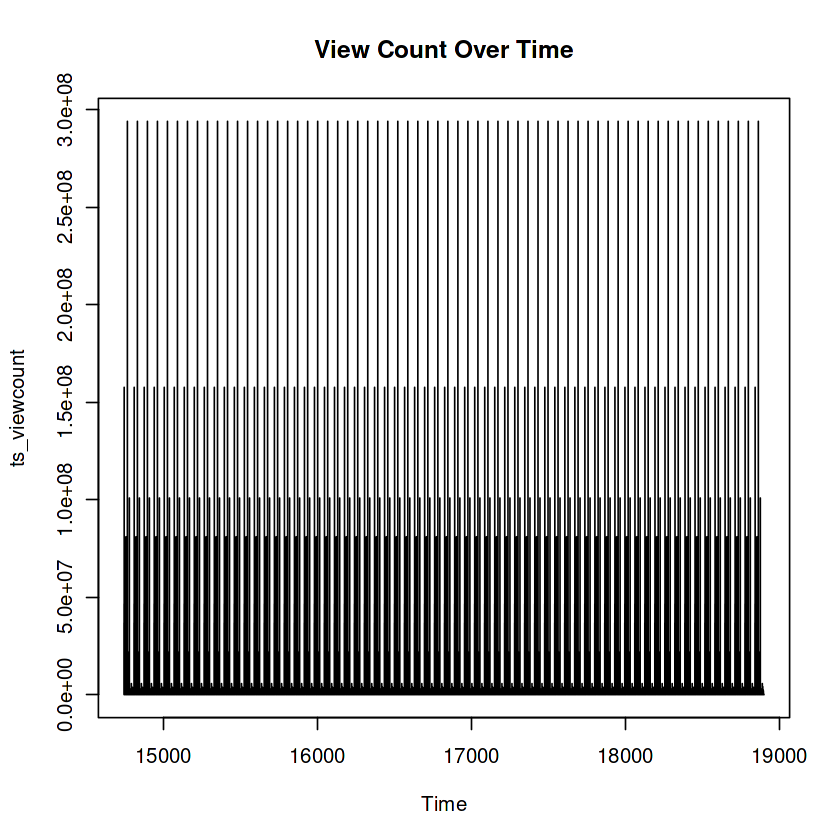

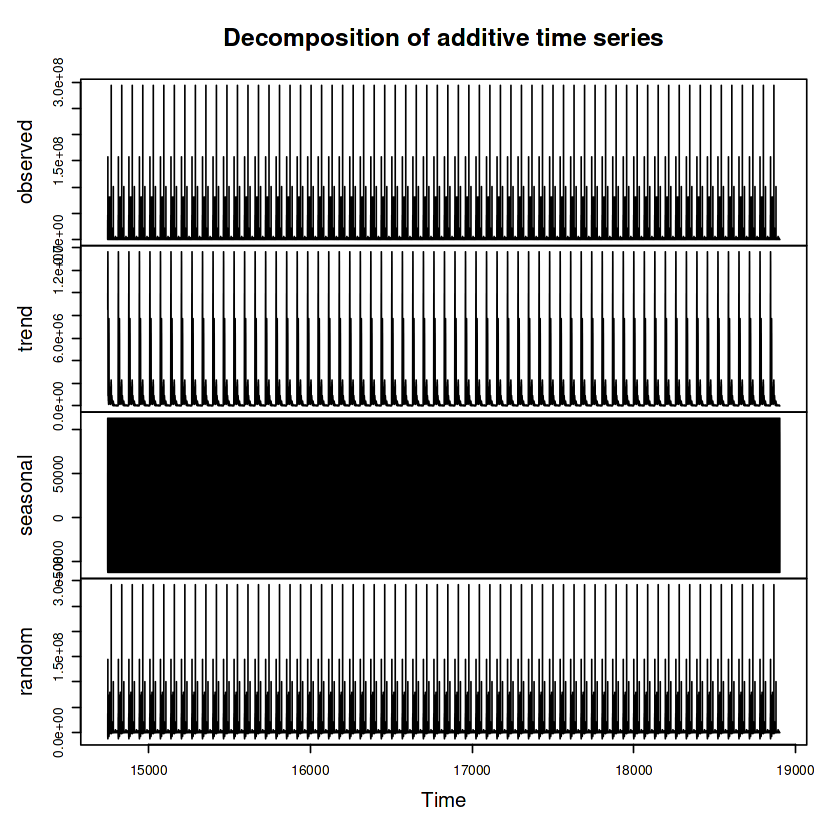

In [54]:
# Convert upload_date to Date format
yt.data$upload_date <- as.Date(yt.data$upload_date, "%Y-%m-%d")

# Create a time series object with view count
ts_viewcount <- ts(yt.data$view_count, start = min(yt.data$upload_date), end = max(yt.data$upload_date), frequency = 365)

# Plot the time series
plot.ts(ts_viewcount, main = "View Count Over Time")

# Decompose the time series into trend, seasonal, and random components
decomp_viewcount <- decompose(ts_viewcount)

# Plot the decomposed components
plot(decomp_viewcount)

**Case 2: Analyzing the relationship between view count and engagement rate over time using cross-correlation**

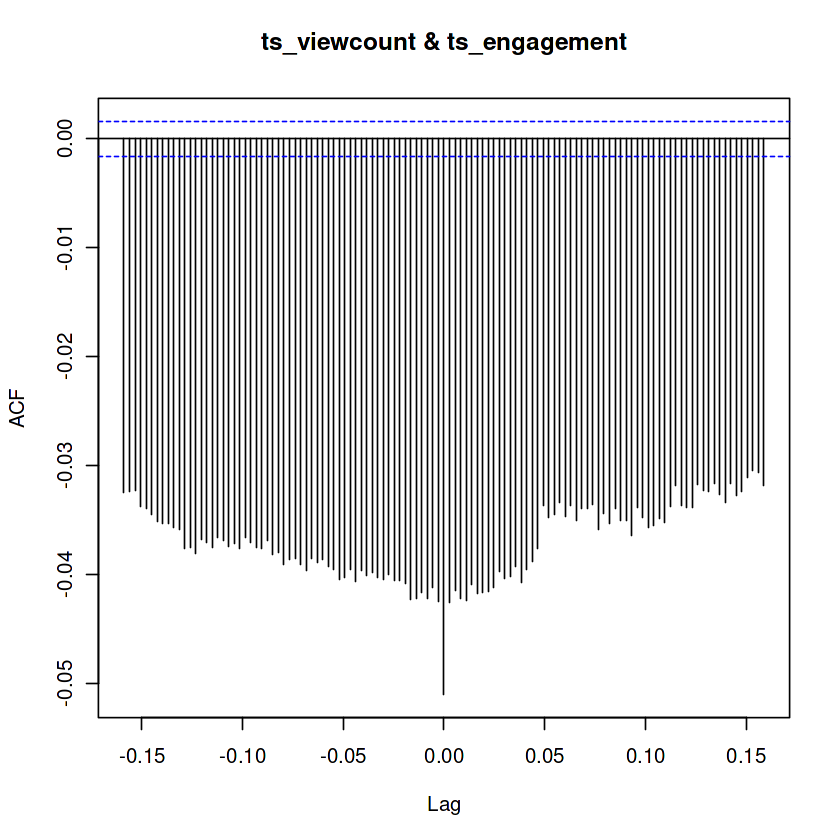

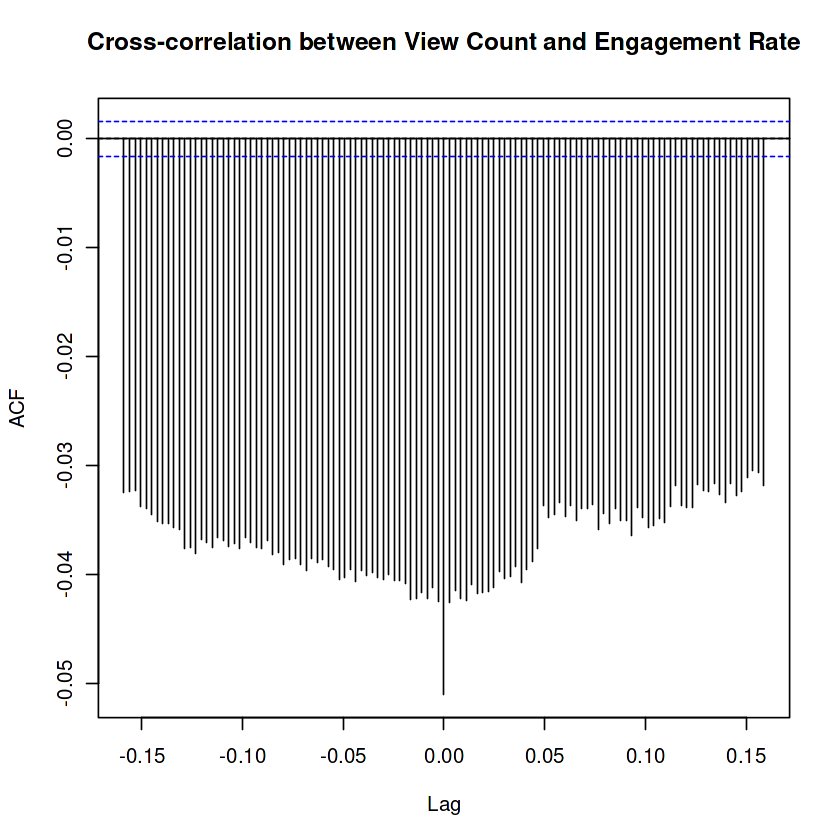

In [60]:
ts_engagement <- ts(yt.data$engagement_rate_1, start = min(yt.data$upload_date), end = max(yt.data$upload_date), frequency = 365)

# Calculate cross-correlation between view count and engagement rate
ccf_viewcount_engagement <- ccf(ts_viewcount, ts_engagement)

# Plot the cross-correlation function
plot(ccf_viewcount_engagement, main = "Cross-correlation between View Count and Engagement Rate")
abline(h = 0, lty = 2)

In [62]:
head(yt.data)

,X,channel_id,channel_name,channel_category,channel_started,channel_rank,channel_subscribers,id,title,title_length,⋯,comment_per_view,dislike_per_view,engagement_rate_1,engagement_rate_2,q_score,label_1,label_2,upload_day,video_length_category,cluster
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>
1,0,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,nehrVdADdH0,[FAP TV ] Thông Báo Tuyển Diễn Viên Nam Film Là Anh Phần 2,14,⋯,0.0024559372,0.0003118179,0.023187373,0.023499191,0.9703641,2,2,Monday,Short,1
2,1,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,K66wOEaBwK4,Phía Sau Một Cô Gái - Soobin Hoàng Sơn | MV Fanmade - FAPtv,14,⋯,0.0006222644,0.0002592118,0.010745968,0.011005180,0.9500696,1,2,Saturday,Short,1
3,2,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,D00vn3X7oI8,FAPtv Cơm Nguội: Tập 94 - Dấu Ấn Học Đường Phần 2,12,⋯,0.0002339762,0.0003264465,0.006241373,0.006567820,0.8969199,1,2,Saturday,Short,4
4,3,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G22G1k3G-kM,FAPtv Cơm Nguội: Tập 100 - Hành Trình Vui Vẻ,10,⋯,0.0002281653,0.0002867694,0.008159384,0.008446154,0.9302093,1,2,Wednesday,Short,4
5,4,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G5EG7ymPErw,FAPtv Cơm Nguội: Tập 95 - Dấu Ấn Học Đường Phần Cuối,12,⋯,0.0003033928,0.0002771582,0.006788618,0.007065776,0.9180294,1,2,Friday,Short,4
6,5,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,vrygmNKYovo,Là Anh Bonus: Phim Ngắn - Lần Đầu | Hi Team - FAPtv,13,⋯,0.0010258188,0.0013958178,0.010486514,0.011882332,0.7428608,1,0,Saturday,Short,4


# **Model for Evaluating channel Performance**


Call:
lm(formula = view_count ~ title_length + duration + like_count + 
    comment_count + dislike_count, data = training_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-34852739   -111406    -12353     45769 213993969 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.247e+05  5.828e+04  -2.139   0.0324 *  
title_length   5.688e+03  4.018e+03   1.416   0.1569    
duration       4.643e+03  6.891e+02   6.738 1.66e-11 ***
like_count     6.786e+01  1.791e+00  37.888  < 2e-16 ***
comment_count  3.080e+02  2.112e+01  14.583  < 2e-16 ***
dislike_count  3.946e+02  3.776e+00 104.499  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2311000 on 16612 degrees of freedom
Multiple R-squared:  0.7009,	Adjusted R-squared:  0.7008 
F-statistic:  7785 on 5 and 16612 DF,  p-value: < 2.2e-16


Root Mean Squared Error:  1447936 
Correlation Coefficient:  0.931197 


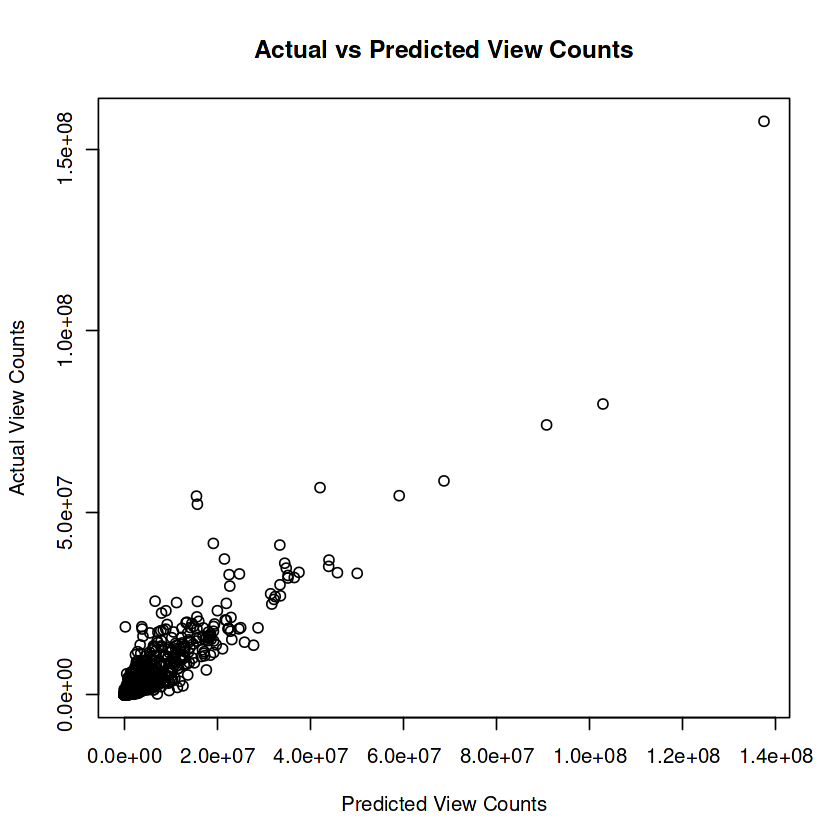

In [63]:
# Load necessary libraries
library(readr)
library(dplyr)
library(caret)


# Split data into training and testing sets
set.seed(123)
training_indices <- createDataPartition(yt.data$view_count, p = 0.7, list = FALSE)
training_data <- yt.data[training_indices, ]
testing_data <- yt.data[-training_indices, ]

# Create a linear regression model
model <- lm(view_count ~ title_length + duration + like_count + comment_count + dislike_count, data = training_data)

# Print the model summary
summary(model)

# Make predictions on the testing data
predictions <- predict(model, newdata = testing_data)

# Calculate the root mean squared error (RMSE) of the model
RMSE <- sqrt(mean((testing_data$view_count - predictions)^2))
cat("Root Mean Squared Error: ", RMSE, "\n")

# Plot actual vs predicted view counts
plot(predictions, testing_data$view_count, main = "Actual vs Predicted View Counts", xlab = "Predicted View Counts", ylab = "Actual View Counts")

# Calculate the correlation coefficient between actual and predicted view counts
correlation <- cor(testing_data$view_count, predictions)
cat("Correlation Coefficient: ", correlation, "\n")

# **Model Creation**

In [68]:
write.csv(yt.data , file="FinalYt.csv")